<a href="https://colab.research.google.com/github/AlirezaPNouri/BERTEmbedding/blob/main/Roberto_storyteller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Author: ALireza P. Nouri
Supervisor: Prof. M. Shahriar Hossain
link to the dataset
https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/raw_data.csv
'''

'\nAuthor: ALireza P. Nouri\nSupervisor: Prof. M. Shahriar Hossain\nlink to the dataset\nhttps://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/raw_data.csv\n'

In [2]:
# to check if the GPU is ready to use
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [3]:
# to tell pytorch that we are going to use GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [4]:
!pip install transformers


     |████████████████████████████████| 2.8 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 40.8 MB/s 
     |████████████████████████████████| 636 kB 39.7 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 3.3 MB 34.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=cbfa4b7f4507f658c3b1198a4a1fff2e9194deae59da8943140ec83f6369bf68
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [6]:
# download the dataset as a zip file
import wget
import os
import requests
print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/raw_data.csv'
res = requests.get(url, allow_redirects=True)
with open('small_dataset_NYT.csv','wb') as file:
    file.write(res.content)
print('Download is done!')

Download is done!


In [7]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/small_dataset_NYT.csv", header= None, skiprows=1,  )
df = df.dropna(how='any', axis=0)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
df = df[0:100]
# Display 10 random rows from the data.
print(df.columns)
df.sample(10)
new_df = df[[1, 2]]
new_df.columns = ['id', 'content']
new_df.head()

Number of training sentences: 101

Int64Index([0, 1, 2], dtype='int64')


id                                            content
0  19900101_0000000  HURRYING through the tunnel at Veterans Stadiu...
1  19900101_0000001  FOR six years, American corporations have been...
2  19900101_0000002  Alcide Chaisson, who is 69 years old and lives...
3  19900101_0000003  Gary Anderson is the third-most accurate kicke...
4  19900101_0000004  The National Bank of Poland is devaluing the P...

In [8]:
# data = new_df[new_df.content.str.contains("Trump")]
# print(data.shape[0])
# print(data.sample)
data = new_df
print('The dimension of the dataset is {}'.format(data.shape))
print(data.sample)

The dimension of the dataset is (100, 2)
<bound method NDFrame.sample of                   id                                            content
0   19900101_0000000  HURRYING through the tunnel at Veterans Stadiu...
1   19900101_0000001  FOR six years, American corporations have been...
2   19900101_0000002  Alcide Chaisson, who is 69 years old and lives...
3   19900101_0000003  Gary Anderson is the third-most accurate kicke...
4   19900101_0000004  The National Bank of Poland is devaluing the P...
..               ...                                                ...
95  19900102_0000095  In his final game, Bo Schembechler refused to ...
96  19900102_0000096  For many an investor, living through 1989 was ...
97  19900102_0000097  The Great Atlantic and Pacific Tea Company, wh...
98  19900102_0000098  The Securitate, Rumania's feared internal poli...
99  19900102_0000099  It was not until the eulogy by his sister Kare...

[100 rows x 2 columns]>


In [9]:
import numpy as np
sentences = data.content.values
labels = data.id.values
print(labels)
labels = [int(d[7])-1 for d in labels]
print(labels)
#function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return len(unique_list)

class_num = unique(labels)
print('The numeber of classes is {}'.format(class_num))
print('length of data is {} and length of labels is {}'.format(len(sentences), len(labels)))

['19900101_0000000' '19900101_0000001' '19900101_0000002'
 '19900101_0000003' '19900101_0000004' '19900101_0000005'
 '19900101_0000006' '19900101_0000007' '19900101_0000008'
 '19900101_0000009' '19900101_0000010' '19900101_0000011'
 '19900101_0000012' '19900101_0000013' '19900101_0000014'
 '19900101_0000015' '19900101_0000016' '19900101_0000017'
 '19900101_0000018' '19900101_0000019' '19900101_0000020'
 '19900101_0000021' '19900101_0000022' '19900101_0000023'
 '19900101_0000024' '19900101_0000025' '19900101_0000026'
 '19900101_0000027' '19900101_0000028' '19900101_0000029'
 '19900101_0000030' '19900101_0000031' '19900101_0000032'
 '19900101_0000033' '19900101_0000034' '19900101_0000035'
 '19900101_0000036' '19900101_0000037' '19900101_0000038'
 '19900101_0000039' '19900101_0000040' '19900101_0000041'
 '19900101_0000042' '19900101_0000043' '19900101_0000044'
 '19900101_0000045' '19900101_0000046' '19900101_0000047'
 '19900101_0000048' '19900101_0000049' '19900101_0000050'
 '19900101_000

In [10]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [11]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, jok

In [40]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
max_length = 256
# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_length,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joke

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [13]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))


Max sentence length:  256


In [14]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

In [15]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [16]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = class_num, # The number of output labels--2 for binary classification. # here temp is the size of the dataset
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [17]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [18]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [25]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 50

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [26]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [27]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [28]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    embedding_layers = []
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        print(batch[2].shape)
        print(batch[1].shape)
        print(batch[0].shape)
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        # print(len(outputs))
        # print(outputs[0]) the loss
        # print(len(outputs[1])) the batches
        # print(len(outputs[2])) the embedding layers
        # import numpy as np
        # print(np.shape(outputs[2]))--->(13,)
        # print(np.shape(outputs[2][1])) --->torch.Size([32, 64, 768]) the embedding in the layer one
        # print(np.shape(outputs[2][2]))--->torch.Size([32, 64, 768]) the embedding in the layer two
        # print(len(outputs[2][3]))
        loss = outputs[0]
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        


======== Epoch 1 / 100 ========
Training...
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([10])
torch.Size([10, 256])
torch.Size([10, 256])

  Average training loss: 0.02
  Training epcoh took: 0:00:08

======== Epoch 2 / 100 ========
Training...
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([10])
torch.Size([10, 256])
torch.Size([10, 256])

  Average training loss: 0.02
  Training epcoh took: 0:00:07

======== Epoch 3 / 100 ========
Training...
torch.Siz

In [29]:
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print(  "")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    #count = 0 # added by Ali
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        
        logits = outputs[0]
        # print(len(outputs))
        # print(np.shape(outputs[1])) # all embedding layers data
        # print(outputs[1][12]) # access to embedding vectors in layer 13
        #count +=1 added by Ali

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    #print(count)
print("")
print("Training complete!")


Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:00

Training complete!


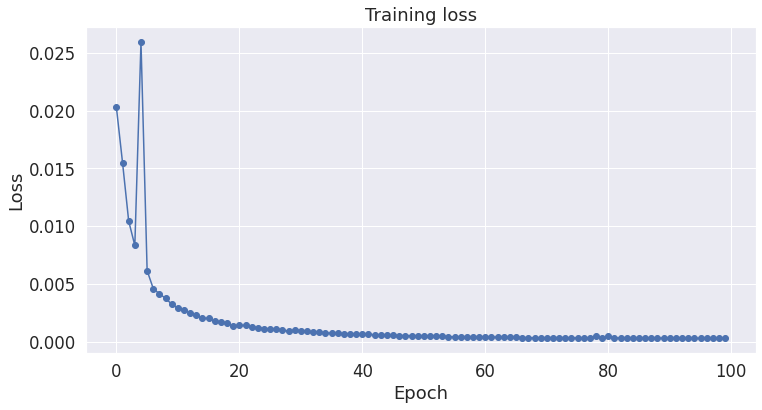

In [30]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [32]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
#the same as the maxlen we used in the encoder_plus function
MAX_LEN = max([len(sen) for sen in input_ids])
# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
# sentences = new_df.text.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = sentences.shape[0]  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 100



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [33]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  print('np.shape(outputs[0]) ', np.shape(outputs[0]))
  print('np.shape(outputs[1][0]) ', np.shape(outputs[1][0]))
  print('np.shape(outputs[1][1]) ', np.shape(outputs[1][1]))
  print('np.shape(outputs[1][12]) ', np.shape(outputs[1][12]))

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 100 test sentences...
np.shape(outputs[0])  torch.Size([100, 2])
np.shape(outputs[1][0])  torch.Size([100, 256, 768])
np.shape(outputs[1][1])  torch.Size([100, 256, 768])
np.shape(outputs[1][12])  torch.Size([100, 256, 768])
    DONE.


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
last_layer = outputs[1][12]
# print out all the sentences
c = 0
for doc in sentences:
  print('doc {} :'.format(c), doc)
  c += 1



doc 0 : HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joked. 

In [142]:

chosen_word = 'president'
list_doc_chosen_word = list()

t = 1
for c in range(0, sentences.shape[0]):
  for doc in tokenizer.tokenize(sentences[c])[0:min(max_length, len(sentences[c]))]:
    if doc == chosen_word:
      list_doc_chosen_word.append(c)
      break


print('List of documents with word [{}] exist: {} '.format(chosen_word, list_doc_chosen_word))


List of documents with word [president] exist: [5, 7, 8, 11, 13, 16, 17, 21, 22, 23, 25, 26, 33, 34, 38, 47, 48, 52, 55, 61, 65, 68, 72, 73, 80, 87, 99] 


In [143]:
dic_word_appearance = dict()
c = 1
word_appearance = list()
for i in list_doc_chosen_word:
  c = 1
  word_appearance = list()
  for word in tokenizer.tokenize(sentences[i])[0:min(max_length, len(sentences[i]))]:
    # print(word)
    if word == chosen_word:
      word_appearance.append(c)
    c += 1
  dic_word_appearance[i] = word_appearance
    
print(dic_word_appearance)


{5: [99, 185], 7: [236], 8: [132], 11: [69, 109, 240], 13: [19], 16: [102, 186], 17: [23, 62, 118, 130, 144], 21: [16, 185], 22: [20], 23: [67], 25: [1], 26: [194], 33: [13, 143, 145], 34: [255], 38: [159], 47: [204], 48: [1], 52: [68], 55: [128], 61: [2, 135], 65: [15], 68: [1, 64, 97], 72: [26, 209], 73: [52], 80: [1], 87: [21], 99: [120]}


In [146]:
#find similarity between chosen word and other words in the doc
def find_similar(embedding_layers, word_index, original_sentence):
  score_dic = dict()
  for j in range(1, min(max_length, len(original_sentence))):
    # print(j)
    score_dic[original_sentence[j -1]] =  cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]
    # print('word is {}, score is {}'.format(original_sentence[j -1], cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]))
  return score_dic

In [162]:
# find similarity without stopwords
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# import gensim
# stop_words = gensim.parsing.preprocessing.STOPWORDS
import spacy
import string
sp = spacy.load('en_core_web_sm')
stop_words = sp.Defaults.stop_words

# print(len(stop_words))
# print(stop_words)
dic_non_stopwords_data = dict()
for doc in list_doc_chosen_word:
  c = 1
  non_stopwords = list()
  for word in tokenizer.tokenize(sentences[i])[0:min(max_length, len(sentences[i]))]: 
    if word not in stop_words:
      if word not in string.punctuation:
        non_stopwords.append(c)
    c +=1
  dic_non_stopwords_data[doc] = non_stopwords
print(dic_non_stopwords_data)
print(tokenizer.tokenize(sentences[5])[0:min(max_length, len(sentences[5]))])
# doc = 5

# print([tokenizer.tokenize(sentences[doc])[i-1] for i in dic_non_stopwords_data[doc]])

for doc in list_doc_chosen_word:
  print('---------------------------------------------------------------')
  print('Doc {}'.format(doc))
  print('---------------------------------------------------------------')
  for word in dic_word_appearance[doc]:
    print(sorted(find_similar(last_layer[doc], word,  tokenizer.tokenize(sentences[doc])).items(), key=lambda kv: kv[1], reverse=True))
  print()
  print()


{5: [1, 3, 4, 5, 8, 9, 11, 12, 15, 18, 21, 22, 23, 25, 27, 32, 34, 35, 39, 44, 45, 46, 48, 50, 52, 54, 56, 57, 59, 60, 62, 64, 65, 67, 68, 71, 72, 74, 75, 76, 77, 80, 82, 83, 84, 86, 88, 93, 94, 95, 97, 99, 100, 102, 104, 107, 108, 109, 111, 113, 114, 117, 118, 121, 122, 123, 124, 127, 128, 129, 132, 135, 136, 139, 140, 143, 146, 147, 148, 149, 152, 155, 156, 157, 158, 160, 163, 164, 166, 171, 172, 173, 175, 176, 181, 183, 185, 186, 188, 192, 194, 195, 197, 198, 202, 203, 205, 209, 213, 214, 216, 217, 219, 220, 221, 222, 226, 227, 229, 231, 232, 235, 237, 238, 240, 242, 244, 245, 249, 251, 254, 255], 7: [1, 3, 4, 5, 8, 9, 11, 12, 15, 18, 21, 22, 23, 25, 27, 32, 34, 35, 39, 44, 45, 46, 48, 50, 52, 54, 56, 57, 59, 60, 62, 64, 65, 67, 68, 71, 72, 74, 75, 76, 77, 80, 82, 83, 84, 86, 88, 93, 94, 95, 97, 99, 100, 102, 104, 107, 108, 109, 111, 113, 114, 117, 118, 121, 122, 123, 124, 127, 128, 129, 132, 135, 136, 139, 140, 143, 146, 147, 148, 149, 152, 155, 156, 157, 158, 160, 163, 164, 166, 1

---------------------------------------------------------------
Doc 5
---------------------------------------------------------------
[0.95543987, 0.94609857, 0.94189197, 0.9364461, 0.9309125, 0.92708415, 0.9263067, 0.9261558, 0.92504895, 0.92125213, 0.9177988, 0.9155951, 0.91507757, 0.9143521, 0.9130658, 0.9114575, 0.9099972, 0.90973705, 0.90847296, 0.907711, 0.9072975, 0.90709364, 0.9069171, 0.9065216, 0.9062005, 0.90590376, 0.9054444, 0.9049133, 0.90477955, 0.9044587, 0.90353537, 0.9020081, 0.9010329, 0.9008985, 0.9001541, 0.8999579, 0.89958835, 0.8992469, 0.89867854, 0.8980105, 0.8979831, 0.8978915, 0.8972099, 0.8967407, 0.8958641, 0.89543283, 0.8949338, 0.8944522, 0.89442086, 0.8922311, 0.8909848, 0.8904189, 0.88856083, 0.8884597, 0.8878871, 0.8873955, 0.8869215, 0.8867206, 0.8863766, 0.8858732, 0.88586223, 0.88554907, 0.8850436, 0.8847247, 0.8846596, 0.8845302, 0.8842963, 0.88253486, 0.88220936, 0.8818165, 0.8815475, 0.8814079, 0.8803772, 0.8800541, 0.8799826, 0.87992465, 0.87990

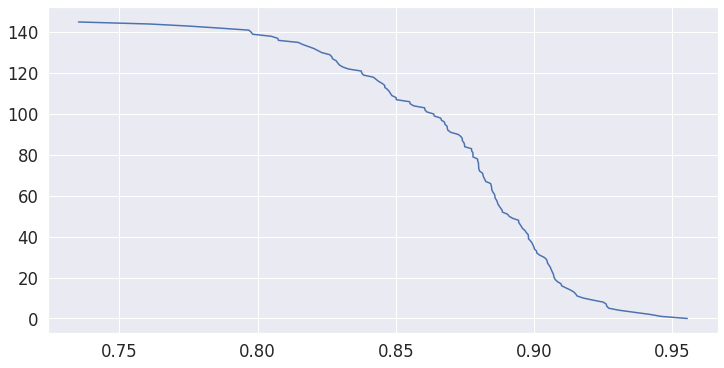

[1.0000002, 0.9855143, 0.9632671, 0.962852, 0.9599142, 0.9545716, 0.9415036, 0.9381041, 0.9380299, 0.93728477, 0.93651503, 0.93496174, 0.9327841, 0.93262243, 0.9307414, 0.9280385, 0.92620254, 0.92538095, 0.9250253, 0.92482483, 0.92396516, 0.92234063, 0.92140406, 0.92097944, 0.9201425, 0.91887355, 0.9180324, 0.9164558, 0.91636086, 0.91539115, 0.91516924, 0.9150294, 0.9134317, 0.91182345, 0.91164744, 0.91125333, 0.9107623, 0.9107598, 0.9106568, 0.9104537, 0.9098433, 0.9096595, 0.9091231, 0.9088919, 0.9086004, 0.9080063, 0.9060212, 0.9057845, 0.90564084, 0.9054441, 0.905406, 0.90530384, 0.90507525, 0.90394306, 0.903515, 0.90323746, 0.90214014, 0.90189135, 0.90163887, 0.9013564, 0.9008651, 0.90027684, 0.8999185, 0.89987123, 0.899606, 0.8995862, 0.89934933, 0.8992812, 0.8990798, 0.89827645, 0.8965258, 0.8963522, 0.8945843, 0.89422166, 0.89239204, 0.8919958, 0.8916813, 0.89163595, 0.8914348, 0.8909577, 0.8906952, 0.88919365, 0.8889997, 0.88813543, 0.88807595, 0.8877071, 0.8876577, 0.8876506,

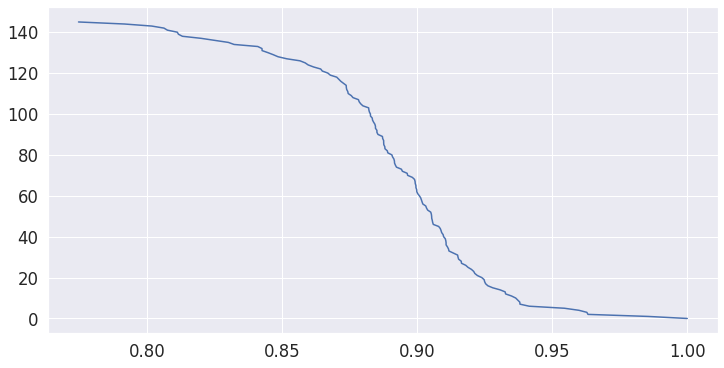



---------------------------------------------------------------
Doc 7
---------------------------------------------------------------
[0.9999999, 0.8357283, 0.819379, 0.8114121, 0.80708194, 0.77934, 0.76244605, 0.76223874, 0.7459008, 0.7371311, 0.7336467, 0.7323288, 0.7317338, 0.7314594, 0.72480416, 0.72313815, 0.71742845, 0.7169583, 0.714334, 0.7139934, 0.71293104, 0.7101227, 0.7081434, 0.70743465, 0.70412266, 0.7024117, 0.70010376, 0.699669, 0.69959074, 0.69918334, 0.6985526, 0.69836706, 0.6954392, 0.69377255, 0.6926278, 0.6917193, 0.69062513, 0.6905947, 0.6882255, 0.68741804, 0.6867292, 0.6776831, 0.6766123, 0.6763038, 0.6762502, 0.67624235, 0.6754054, 0.6723496, 0.67179847, 0.66771823, 0.6668922, 0.66687673, 0.666034, 0.664041, 0.6624757, 0.662338, 0.6621001, 0.6614517, 0.65880954, 0.6575994, 0.657245, 0.6571959, 0.6543874, 0.65305984, 0.65027094, 0.6494169, 0.6487402, 0.6477726, 0.6474364, 0.646886, 0.6453911, 0.6445866, 0.6434603, 0.6434535, 0.64085907, 0.63930404, 0.6387607, 0

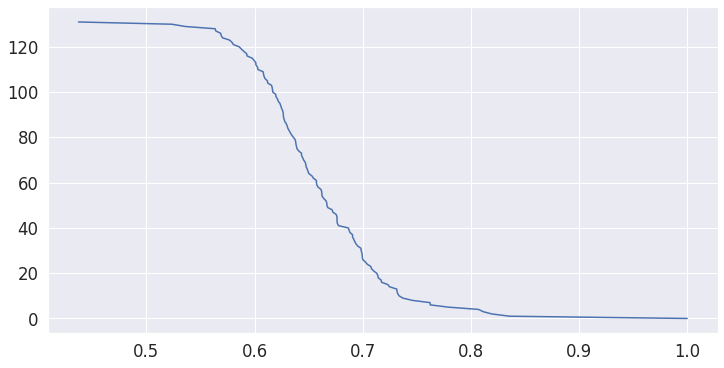



---------------------------------------------------------------
Doc 8
---------------------------------------------------------------
[1.0, 0.93332815, 0.9242505, 0.91889703, 0.9018561, 0.871758, 0.8645715, 0.86158675, 0.85084295, 0.8453002, 0.8451359, 0.8441486, 0.84183, 0.8389478, 0.83797264, 0.83787704, 0.83723676, 0.8365307, 0.8337922, 0.8327547, 0.8311113, 0.8310862, 0.8300822, 0.82357264, 0.8224877, 0.8220241, 0.82180595, 0.81885844, 0.8171061, 0.8163756, 0.8114505, 0.8105573, 0.8085135, 0.8077839, 0.8076947, 0.8045885, 0.8044887, 0.8022425, 0.80113035, 0.8010514, 0.79896325, 0.7946007, 0.7927517, 0.7877576, 0.7828848, 0.7827294, 0.78109133, 0.7808918, 0.78054917, 0.77997684, 0.77985096, 0.779773, 0.77973825, 0.7795745, 0.77867365, 0.77607596, 0.77336967, 0.7732187, 0.7711391, 0.771069, 0.77082235, 0.76979077, 0.76934767, 0.7675497, 0.7652401, 0.7640232, 0.76345253, 0.7633748, 0.7629377, 0.76292706, 0.7615902, 0.76077616, 0.75997794, 0.75924945, 0.75473046, 0.7504908, 0.7504089

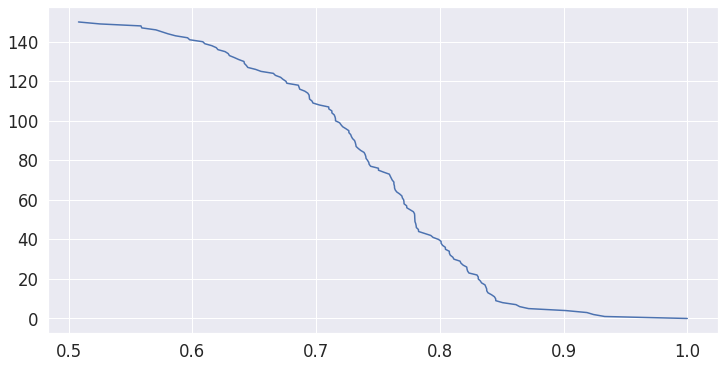



---------------------------------------------------------------
Doc 11
---------------------------------------------------------------
[0.8766433, 0.86647505, 0.86300194, 0.8542478, 0.84614193, 0.8272813, 0.81678605, 0.8111966, 0.7998342, 0.79901755, 0.7984108, 0.7964778, 0.7910944, 0.78485096, 0.7808317, 0.7781553, 0.7775271, 0.7757863, 0.77448314, 0.7715089, 0.7713072, 0.7682718, 0.7620164, 0.7619794, 0.7601453, 0.75871783, 0.75734174, 0.75701267, 0.7563065, 0.7538058, 0.7513615, 0.7501654, 0.7496556, 0.7492455, 0.7473885, 0.7453147, 0.74492717, 0.7446372, 0.7443358, 0.7427329, 0.74112815, 0.7403877, 0.73693097, 0.7365846, 0.73322266, 0.7324489, 0.7316291, 0.7286461, 0.7283359, 0.7214347, 0.7211885, 0.7211164, 0.720805, 0.7207668, 0.71915084, 0.71764135, 0.71516335, 0.7138916, 0.71353996, 0.7122463, 0.71217, 0.7114204, 0.7113452, 0.71115685, 0.709674, 0.7089304, 0.7057321, 0.7015691, 0.6999778, 0.6982267, 0.6981908, 0.69708025, 0.6931312, 0.6899133, 0.68977946, 0.6859568, 0.6839998

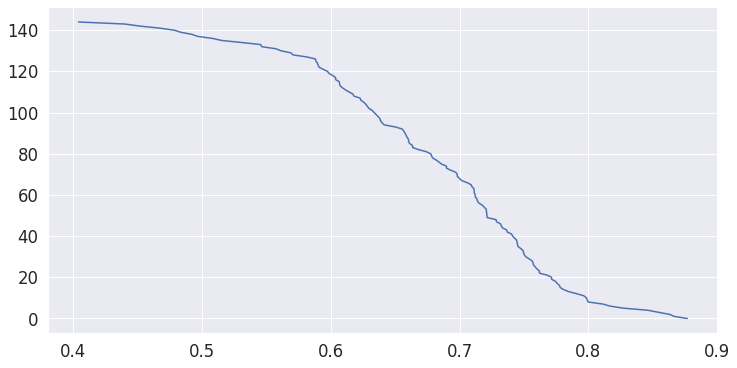

[0.90166605, 0.8578503, 0.8293052, 0.8255204, 0.82297325, 0.8218734, 0.8218722, 0.8152125, 0.8085794, 0.80275214, 0.8017416, 0.8003458, 0.7972826, 0.7803557, 0.77524364, 0.77203196, 0.77081215, 0.7699435, 0.7689017, 0.76697016, 0.7653488, 0.7636467, 0.76225483, 0.7617631, 0.7616377, 0.759584, 0.7594372, 0.75659645, 0.7549855, 0.7542888, 0.7534872, 0.7531128, 0.7494769, 0.7489164, 0.7488095, 0.7478275, 0.74657536, 0.74496084, 0.74327064, 0.74183524, 0.74016476, 0.73851085, 0.7355952, 0.73547685, 0.7321148, 0.72982806, 0.7285838, 0.7283962, 0.7277702, 0.7274183, 0.7273953, 0.72568613, 0.7245546, 0.7244321, 0.7234467, 0.72242, 0.7190262, 0.717214, 0.7166405, 0.7163718, 0.71518517, 0.7142813, 0.7140895, 0.71276003, 0.71257246, 0.71216077, 0.71119165, 0.71046036, 0.70941997, 0.7088353, 0.7085503, 0.7042167, 0.7040053, 0.69995224, 0.69971365, 0.69934785, 0.69696134, 0.69496876, 0.6943786, 0.6942824, 0.69349205, 0.6928768, 0.692189, 0.6917101, 0.6911382, 0.6909644, 0.6890868, 0.6864512, 0.685

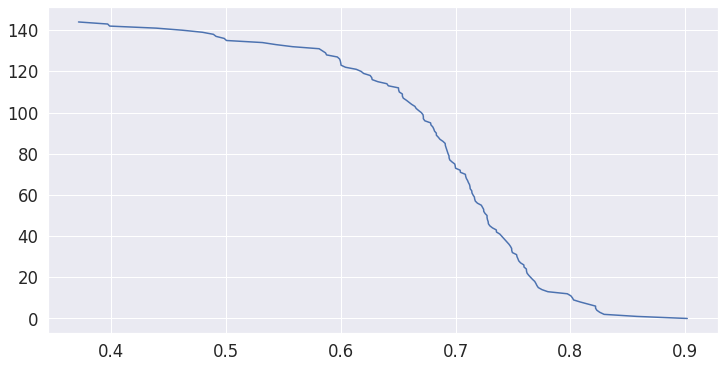

[0.99999994, 0.7992724, 0.783552, 0.7397773, 0.7298852, 0.72136176, 0.71741825, 0.7030693, 0.70266646, 0.70090675, 0.69914293, 0.6925037, 0.6916959, 0.6901674, 0.67625093, 0.6745925, 0.674451, 0.6715496, 0.6713182, 0.67032623, 0.6649703, 0.664071, 0.66372067, 0.6630956, 0.6577554, 0.65557015, 0.6541891, 0.65298676, 0.6516783, 0.6511867, 0.6507865, 0.6488278, 0.6480397, 0.64483994, 0.6444817, 0.6413387, 0.6393818, 0.6391937, 0.63781023, 0.6361308, 0.6327416, 0.63269204, 0.631773, 0.6306891, 0.62995577, 0.6296258, 0.62883717, 0.6281081, 0.6279995, 0.6268103, 0.6264684, 0.62526, 0.62511015, 0.62264633, 0.6223455, 0.6217799, 0.62031204, 0.6189203, 0.61811876, 0.6179634, 0.61728895, 0.61665654, 0.6152296, 0.61507773, 0.613478, 0.613341, 0.61201954, 0.61141014, 0.60908407, 0.60889924, 0.60848486, 0.6083708, 0.60773754, 0.6058986, 0.6056297, 0.6052184, 0.6033976, 0.60327804, 0.6024862, 0.60245514, 0.60200834, 0.6017194, 0.59841067, 0.5979233, 0.59766865, 0.5976041, 0.5973455, 0.5966631, 0.596

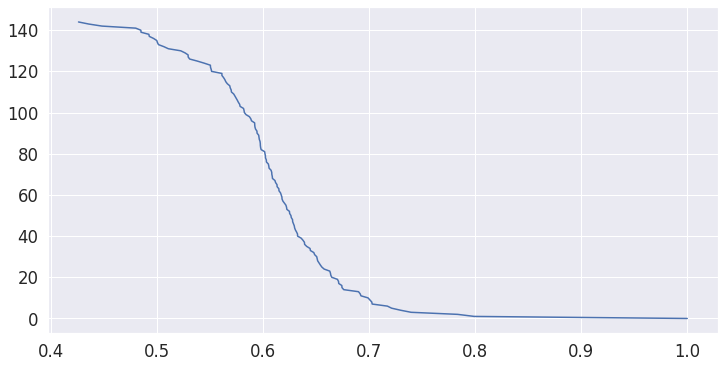



---------------------------------------------------------------
Doc 13
---------------------------------------------------------------
[1.0, 0.95515007, 0.9549615, 0.93105155, 0.9277929, 0.9234849, 0.9033087, 0.9018016, 0.89772856, 0.89519256, 0.8949169, 0.89314795, 0.88828075, 0.88650525, 0.8849783, 0.8826648, 0.8822472, 0.88100106, 0.8790497, 0.8784386, 0.8780561, 0.8777907, 0.87613094, 0.8724155, 0.8710579, 0.87096083, 0.8704872, 0.86919385, 0.867698, 0.8660594, 0.8655107, 0.8643175, 0.86418927, 0.86375797, 0.8631687, 0.863056, 0.8618982, 0.8612032, 0.85695994, 0.85642195, 0.85452086, 0.8537815, 0.8490844, 0.84717464, 0.84627765, 0.84519094, 0.8419962, 0.84139544, 0.8295244, 0.8282169, 0.82797354, 0.8268776, 0.8224048, 0.82180196, 0.82114965, 0.81077325, 0.81055814, 0.80974853, 0.8069818, 0.8067022, 0.80643725, 0.8046037, 0.8042959, 0.80373, 0.8008276, 0.7968757, 0.79369223, 0.78134066, 0.76960856, 0.7691208, 0.7690711, 0.767624, 0.76530516, 0.764386, 0.76323766, 0.76241416, 0.761

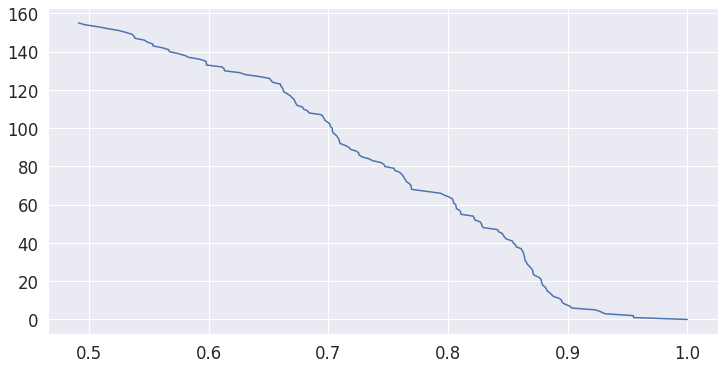



---------------------------------------------------------------
Doc 16
---------------------------------------------------------------
[0.9606323, 0.94269985, 0.93702435, 0.9041067, 0.8913064, 0.89010555, 0.8841801, 0.86901367, 0.86420965, 0.86032784, 0.8599812, 0.85797167, 0.8570383, 0.8562774, 0.8554221, 0.8552592, 0.8545104, 0.852057, 0.84674954, 0.84343153, 0.84235823, 0.83838224, 0.83804834, 0.82806844, 0.826636, 0.82505095, 0.82473946, 0.81803644, 0.8152573, 0.81404567, 0.81391114, 0.8126383, 0.80987924, 0.8079368, 0.80331147, 0.80141056, 0.7988237, 0.7963105, 0.7933495, 0.79306805, 0.791193, 0.7907374, 0.78993905, 0.78618085, 0.7783122, 0.77545345, 0.7719061, 0.77024233, 0.77018595, 0.76884747, 0.76836234, 0.76742685, 0.765265, 0.7650009, 0.7648835, 0.7637304, 0.7624015, 0.76238364, 0.761979, 0.7601404, 0.75923884, 0.75750554, 0.75515866, 0.75348634, 0.74889493, 0.7479743, 0.7466668, 0.74436176, 0.7408447, 0.7392794, 0.7365331, 0.73536444, 0.73007303, 0.72829837, 0.72754836, 0

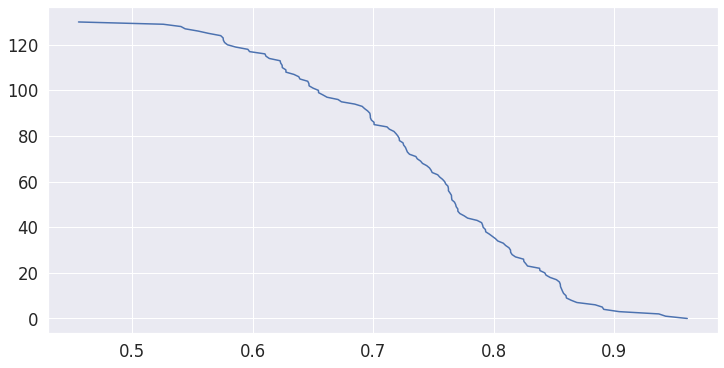

[0.99999994, 0.9217491, 0.8854819, 0.8597925, 0.8470316, 0.8312851, 0.78905344, 0.7732763, 0.7678727, 0.7643723, 0.7642298, 0.7636527, 0.7624212, 0.76127416, 0.75693667, 0.7518608, 0.75120735, 0.7505784, 0.74884784, 0.7425839, 0.73950887, 0.738807, 0.73745745, 0.73679066, 0.7362642, 0.73486245, 0.7340909, 0.7289107, 0.7275816, 0.72633713, 0.726325, 0.72509146, 0.7247646, 0.72306824, 0.7226783, 0.72245914, 0.7206465, 0.7205748, 0.72028255, 0.7180053, 0.7092018, 0.7091837, 0.7090459, 0.70899725, 0.70616317, 0.70536, 0.7045267, 0.7008413, 0.7007313, 0.7000973, 0.6987307, 0.6986217, 0.698159, 0.6976068, 0.69707656, 0.6963197, 0.6960639, 0.6955716, 0.6945572, 0.69390213, 0.6938472, 0.6930926, 0.6926116, 0.6900053, 0.6896075, 0.6888591, 0.6887785, 0.6866317, 0.68656456, 0.6862261, 0.6852771, 0.68472075, 0.6846556, 0.6842587, 0.68416286, 0.683835, 0.6830537, 0.6817546, 0.67588925, 0.6757732, 0.67414653, 0.6690625, 0.66668123, 0.666103, 0.66526955, 0.66447365, 0.6635238, 0.66272485, 0.6619208,

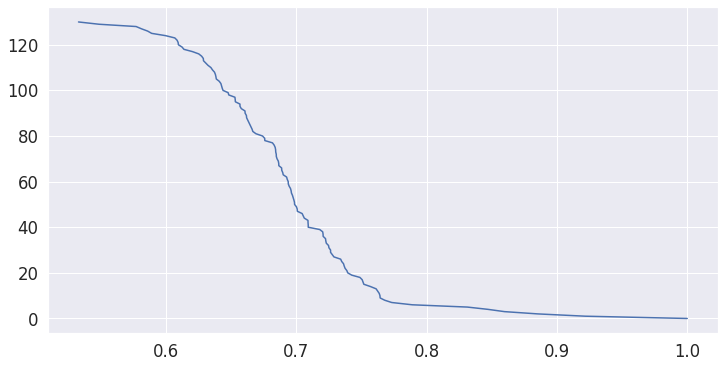



---------------------------------------------------------------
Doc 17
---------------------------------------------------------------
[0.9093119, 0.8810202, 0.8791374, 0.8784466, 0.87229156, 0.8713172, 0.870913, 0.86993206, 0.86653554, 0.8662573, 0.86405057, 0.85386515, 0.8523786, 0.8507571, 0.84991175, 0.84835553, 0.84501785, 0.8437655, 0.8431063, 0.8426776, 0.8412551, 0.84059596, 0.8396255, 0.83941424, 0.8380339, 0.8367318, 0.8362363, 0.8361088, 0.8352481, 0.83490366, 0.83433914, 0.8336201, 0.8323487, 0.8313941, 0.8312776, 0.82950896, 0.8286195, 0.82768834, 0.8262279, 0.8248118, 0.8245233, 0.8242514, 0.8213606, 0.8212922, 0.82060736, 0.8204752, 0.81983995, 0.81901526, 0.8182978, 0.8181474, 0.817788, 0.8175566, 0.8168918, 0.8168807, 0.81634444, 0.8160118, 0.8151788, 0.81349283, 0.8125186, 0.81184536, 0.81184113, 0.81120574, 0.81053126, 0.8078763, 0.8069901, 0.80690485, 0.8063121, 0.80630016, 0.80312216, 0.80132186, 0.79822814, 0.798031, 0.79198647, 0.790828, 0.7846323, 0.78168964, 

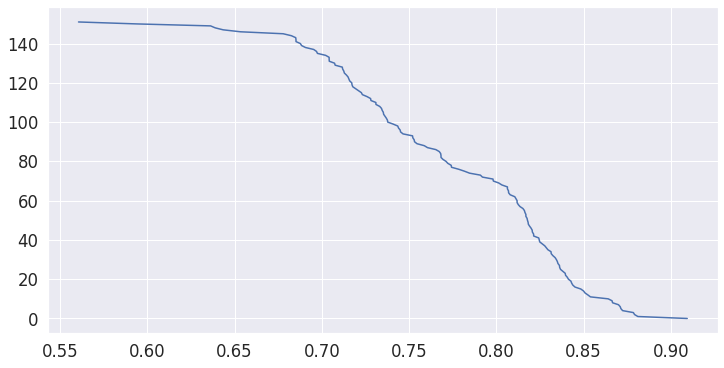

[0.9395301, 0.9209345, 0.918024, 0.9178572, 0.9111047, 0.9068681, 0.9027914, 0.89743334, 0.89280736, 0.89003414, 0.8896699, 0.8889823, 0.88522637, 0.88423383, 0.88284785, 0.8815065, 0.88141716, 0.88064575, 0.8797355, 0.87954307, 0.8755054, 0.87548095, 0.8749087, 0.87324685, 0.8727674, 0.8723544, 0.87160397, 0.8715975, 0.8711786, 0.8691798, 0.8683021, 0.86719775, 0.865611, 0.8641504, 0.8610366, 0.8603656, 0.8602761, 0.8597888, 0.8597331, 0.85956013, 0.859331, 0.85932606, 0.8583224, 0.8580664, 0.8572427, 0.85716474, 0.85692155, 0.8556403, 0.8547915, 0.854609, 0.854398, 0.85371673, 0.85234624, 0.8520011, 0.8500836, 0.8485939, 0.84811664, 0.8479282, 0.84777987, 0.8457351, 0.8443489, 0.8426796, 0.8423159, 0.84228873, 0.84160036, 0.84129405, 0.83958507, 0.8377018, 0.8337283, 0.8270358, 0.82665133, 0.8177655, 0.81595683, 0.8157882, 0.81485105, 0.81272733, 0.8120025, 0.8082082, 0.8073337, 0.8055364, 0.80352354, 0.79723716, 0.7967439, 0.7962532, 0.79485834, 0.79231584, 0.7905868, 0.7892872, 0.7

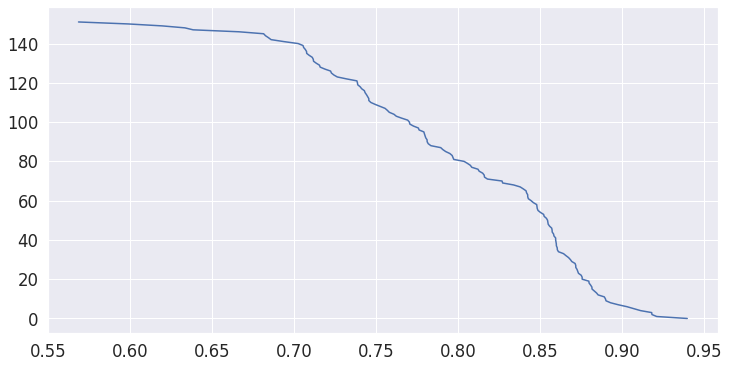

[0.9528481, 0.92177355, 0.9194522, 0.9135861, 0.9081188, 0.89846945, 0.89806974, 0.89760756, 0.89591837, 0.894125, 0.8786787, 0.87748325, 0.87737215, 0.87083, 0.8706117, 0.86625737, 0.8659849, 0.8656904, 0.86216, 0.8607803, 0.85884786, 0.8579979, 0.8552618, 0.8546498, 0.8540101, 0.8530991, 0.8530946, 0.852929, 0.8527199, 0.85164076, 0.8511001, 0.8487063, 0.84678155, 0.8463783, 0.844679, 0.84459096, 0.8441912, 0.8439982, 0.8428576, 0.8425089, 0.8403073, 0.839736, 0.83876896, 0.8376124, 0.8372597, 0.83461154, 0.83389175, 0.8320779, 0.8319198, 0.8316325, 0.8307239, 0.8298412, 0.82888496, 0.8275821, 0.8274665, 0.8267146, 0.82518834, 0.82224524, 0.8215109, 0.81893647, 0.8180442, 0.81803536, 0.8172941, 0.815765, 0.81536806, 0.81534314, 0.81474054, 0.81386447, 0.8105309, 0.80982, 0.80971086, 0.8061594, 0.8059079, 0.80544704, 0.80445516, 0.8036219, 0.802988, 0.80037045, 0.80031455, 0.7999593, 0.79832447, 0.7969805, 0.79425955, 0.79298365, 0.79005337, 0.78796655, 0.78649545, 0.7860483, 0.785823

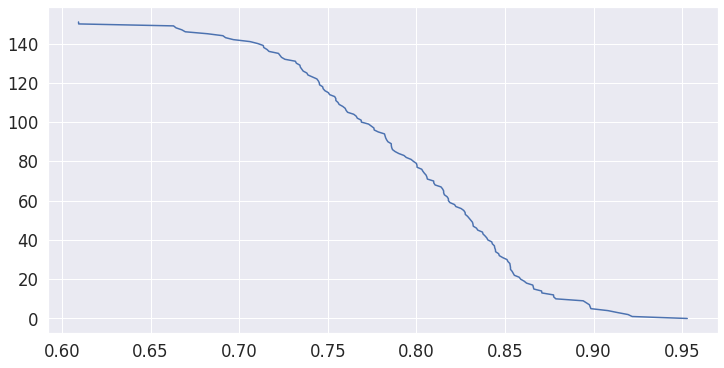

[0.92919797, 0.92253935, 0.92076415, 0.91039574, 0.90386784, 0.90286845, 0.9028274, 0.9013407, 0.89422023, 0.88884103, 0.8848994, 0.88347423, 0.8763226, 0.87616444, 0.8750374, 0.8741242, 0.8735342, 0.8710749, 0.86803794, 0.86699814, 0.8661204, 0.8658435, 0.8654617, 0.86513007, 0.8632337, 0.86220497, 0.8612145, 0.8607539, 0.86053896, 0.859601, 0.858727, 0.8584672, 0.8571403, 0.85316706, 0.8528719, 0.8527804, 0.8525566, 0.8519424, 0.85168815, 0.84896606, 0.84771883, 0.8470239, 0.8456573, 0.8452545, 0.8446226, 0.84412694, 0.8440626, 0.8440206, 0.8417048, 0.8410495, 0.8394338, 0.83744, 0.83591557, 0.83409464, 0.8329023, 0.8313482, 0.8281251, 0.8271915, 0.826136, 0.82589805, 0.8248013, 0.82294214, 0.8218373, 0.820385, 0.8200699, 0.8187543, 0.8177624, 0.8167646, 0.813117, 0.812188, 0.8092406, 0.8091631, 0.8081111, 0.80544096, 0.8053554, 0.804724, 0.80150384, 0.7990902, 0.7988623, 0.79497206, 0.79349613, 0.7930733, 0.7930662, 0.7929999, 0.7874174, 0.78494155, 0.7847538, 0.7842126, 0.78361917,

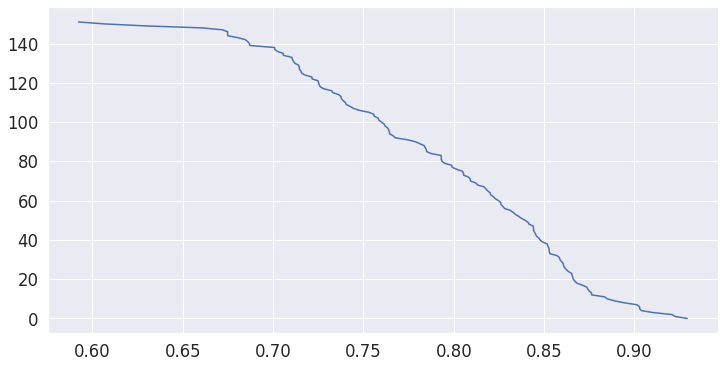

[1.0000001, 0.9325927, 0.9301071, 0.90900946, 0.90278256, 0.8949789, 0.88803303, 0.87570274, 0.8739573, 0.8676491, 0.85762024, 0.85457957, 0.8538201, 0.85356474, 0.8504034, 0.84960735, 0.8484669, 0.8478856, 0.8474138, 0.8473701, 0.84734476, 0.8470844, 0.8462119, 0.8424524, 0.84087294, 0.83981025, 0.83943987, 0.83728695, 0.8371017, 0.8366839, 0.83628166, 0.8352318, 0.83428264, 0.8306323, 0.82895046, 0.8285388, 0.8281635, 0.82757497, 0.82432675, 0.8238089, 0.82302856, 0.82278764, 0.821854, 0.8213805, 0.8200178, 0.8186955, 0.8170953, 0.8165779, 0.81650305, 0.8164159, 0.8162823, 0.81617165, 0.8159145, 0.8153285, 0.8153244, 0.81517494, 0.8135617, 0.8126819, 0.8118321, 0.8114442, 0.8107593, 0.8099458, 0.8096733, 0.80921566, 0.80904716, 0.80891645, 0.808859, 0.8078698, 0.8073133, 0.80664396, 0.8051177, 0.8030286, 0.8022515, 0.7997822, 0.7990086, 0.79747605, 0.79663503, 0.79589, 0.79528344, 0.78996277, 0.7898528, 0.7898396, 0.7876513, 0.78186744, 0.7813486, 0.77846944, 0.7777097, 0.7768347, 0.

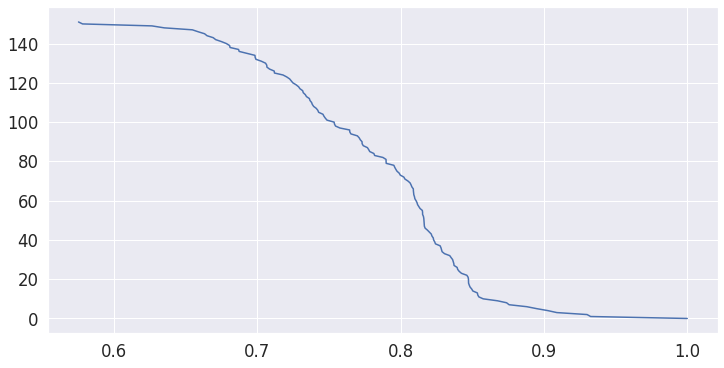



---------------------------------------------------------------
Doc 21
---------------------------------------------------------------
[0.82786405, 0.75403297, 0.7421994, 0.7324161, 0.6973889, 0.67202204, 0.64515966, 0.6375877, 0.63662744, 0.60888934, 0.6008631, 0.59025335, 0.57942516, 0.5761609, 0.5730611, 0.56540847, 0.5430019, 0.541414, 0.5368209, 0.5268868, 0.5246955, 0.5212228, 0.5179357, 0.51724434, 0.51654446, 0.5165124, 0.5059852, 0.49750575, 0.49656153, 0.49612245, 0.49434668, 0.4916091, 0.49074003, 0.49056396, 0.48861504, 0.48799717, 0.4868363, 0.48540223, 0.48223335, 0.4800406, 0.47744787, 0.47741333, 0.47655335, 0.47114378, 0.47009927, 0.46963012, 0.46838123, 0.46772426, 0.4666126, 0.4636718, 0.45818436, 0.4578229, 0.45373914, 0.4520868, 0.45017067, 0.44935027, 0.44885567, 0.44879276, 0.44872558, 0.448618, 0.44638586, 0.4455276, 0.4452526, 0.44417146, 0.4392711, 0.43739372, 0.4367634, 0.43627822, 0.4336828, 0.4324292, 0.43077344, 0.42893106, 0.42148954, 0.42148867, 0.4204

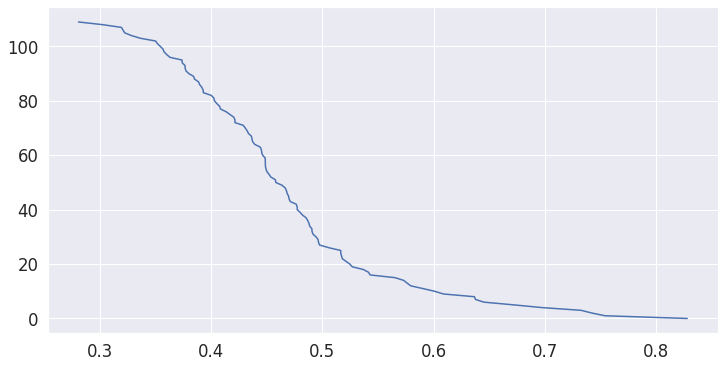

[1.0000001, 0.8282262, 0.7495513, 0.72835886, 0.7071371, 0.6876675, 0.6443964, 0.6421423, 0.6090814, 0.601687, 0.5818719, 0.5801711, 0.57558346, 0.5754554, 0.57400537, 0.5686794, 0.5686446, 0.56797594, 0.56479764, 0.5633637, 0.554707, 0.55437374, 0.5542092, 0.553866, 0.55122477, 0.55004, 0.54928184, 0.5420079, 0.5405044, 0.5398329, 0.5391027, 0.5362855, 0.5347267, 0.53092873, 0.5304402, 0.52816176, 0.5279772, 0.52366936, 0.5235435, 0.5216755, 0.51797193, 0.51598054, 0.5136008, 0.5128665, 0.50258255, 0.5017867, 0.5009376, 0.49933434, 0.4973098, 0.49520048, 0.495001, 0.49341238, 0.49323803, 0.4925526, 0.49180537, 0.4910481, 0.49018127, 0.48925325, 0.4878221, 0.48767626, 0.48384932, 0.48223493, 0.47933906, 0.478939, 0.47699764, 0.47196764, 0.4715941, 0.4702224, 0.4690854, 0.4641627, 0.46381128, 0.4635173, 0.46045738, 0.4602542, 0.45965645, 0.45881224, 0.4574824, 0.45699102, 0.4536916, 0.45226467, 0.44651553, 0.44628674, 0.44260836, 0.44120896, 0.438567, 0.4385072, 0.4379555, 0.43738246, 0

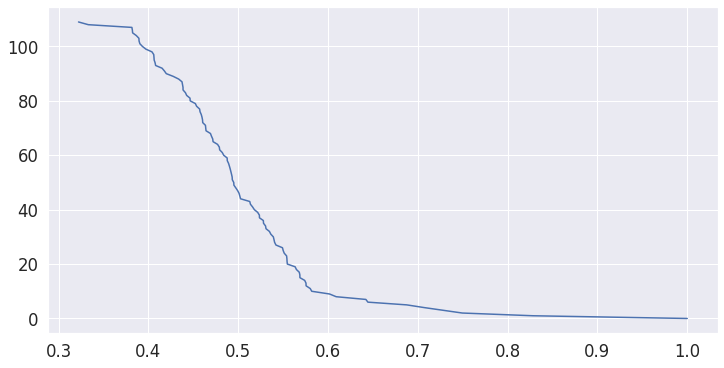



---------------------------------------------------------------
Doc 22
---------------------------------------------------------------
[0.9999998, 0.9446215, 0.9380845, 0.93424, 0.93343556, 0.92815983, 0.9279108, 0.9220905, 0.92206526, 0.9206815, 0.9190507, 0.91783696, 0.91698945, 0.9169786, 0.91660434, 0.91608614, 0.9142436, 0.9142221, 0.913865, 0.9136325, 0.9134987, 0.91208816, 0.9118767, 0.9116313, 0.9108609, 0.9105217, 0.9102398, 0.9099338, 0.9084827, 0.9072424, 0.9070543, 0.9067755, 0.9063953, 0.9061601, 0.905527, 0.9032286, 0.902889, 0.90226483, 0.9008385, 0.90065634, 0.90056205, 0.9004965, 0.9000113, 0.8999242, 0.8989374, 0.8986151, 0.8985543, 0.89782196, 0.89741725, 0.8961359, 0.8960641, 0.8956087, 0.8951617, 0.89508367, 0.89489126, 0.8942416, 0.89361745, 0.8933116, 0.893255, 0.8930711, 0.8922491, 0.8921747, 0.8914521, 0.8892329, 0.88813215, 0.88456726, 0.88392955, 0.88305867, 0.8823558, 0.88231325, 0.87931925, 0.8786297, 0.87549955, 0.87264246, 0.87002546, 0.86815226, 0.8674

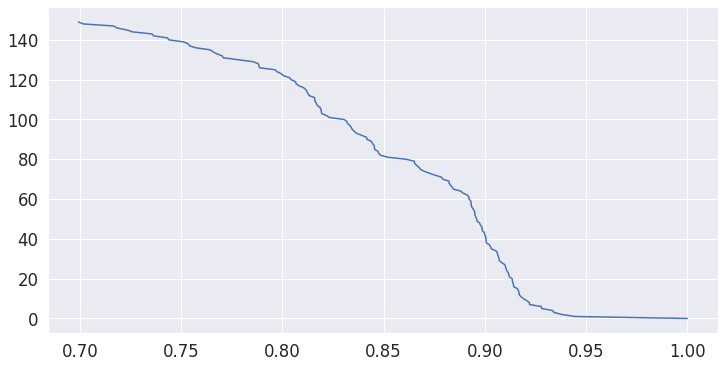



---------------------------------------------------------------
Doc 23
---------------------------------------------------------------
[1.0000002, 0.9114476, 0.8785096, 0.8773829, 0.86957175, 0.86787033, 0.8659561, 0.8625032, 0.85781986, 0.8576375, 0.8538669, 0.8480894, 0.8405856, 0.83909756, 0.8388661, 0.83670855, 0.835616, 0.8340217, 0.8313465, 0.82851756, 0.82830447, 0.8263602, 0.8232391, 0.81872785, 0.81748736, 0.81381327, 0.8130896, 0.8129811, 0.8121705, 0.81214803, 0.8105315, 0.8059763, 0.8040633, 0.80076635, 0.80019605, 0.79933655, 0.7977512, 0.7949996, 0.7929281, 0.7902838, 0.7895959, 0.7892108, 0.78541064, 0.78321874, 0.7818655, 0.7786782, 0.77803886, 0.7770685, 0.7752638, 0.7745397, 0.77317387, 0.77247226, 0.77076054, 0.77034783, 0.7691568, 0.7681734, 0.7676258, 0.7669021, 0.76544327, 0.76355994, 0.7630414, 0.7609801, 0.75917625, 0.75914574, 0.7588576, 0.75790966, 0.75380206, 0.7533579, 0.75186336, 0.75170183, 0.7474259, 0.7473444, 0.74580574, 0.74372965, 0.74353826, 0.7433

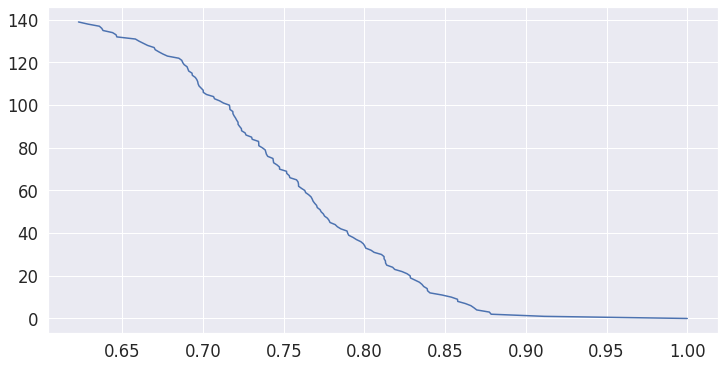



---------------------------------------------------------------
Doc 25
---------------------------------------------------------------
[0.99999976, 0.968175, 0.95863914, 0.9577577, 0.9560503, 0.9547454, 0.94619954, 0.9437314, 0.93985975, 0.93971026, 0.93816227, 0.93726444, 0.9320999, 0.93082505, 0.92915773, 0.9274471, 0.9268365, 0.9255103, 0.9237943, 0.92342186, 0.92184, 0.92006505, 0.91832906, 0.9176045, 0.917101, 0.91624963, 0.91395056, 0.91322136, 0.9128482, 0.91237515, 0.91226417, 0.910477, 0.91035265, 0.910225, 0.90935886, 0.90924966, 0.90880084, 0.9078944, 0.9073105, 0.9070164, 0.906735, 0.90667224, 0.90647876, 0.9052438, 0.9044281, 0.90410596, 0.90377355, 0.9033813, 0.9027843, 0.9027537, 0.90190053, 0.9013138, 0.9006556, 0.9006127, 0.89990073, 0.89978147, 0.8992444, 0.8985786, 0.8978374, 0.8977554, 0.897712, 0.89764607, 0.8967861, 0.89653915, 0.8963187, 0.89590764, 0.8955862, 0.89521444, 0.89510167, 0.8950108, 0.8939066, 0.89306283, 0.89272296, 0.8927188, 0.8926847, 0.89225864

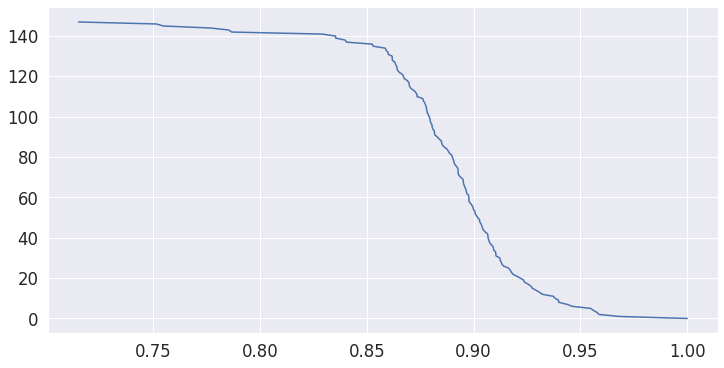



---------------------------------------------------------------
Doc 26
---------------------------------------------------------------
[0.99999994, 0.93829006, 0.91747046, 0.8985407, 0.87163794, 0.8707306, 0.8042264, 0.7889911, 0.7838254, 0.77703273, 0.77025485, 0.7690966, 0.7653261, 0.7588649, 0.7583931, 0.75803554, 0.75748867, 0.75367665, 0.7502289, 0.7496764, 0.7494867, 0.74714875, 0.74251664, 0.74149364, 0.74068135, 0.73832756, 0.7372477, 0.7370471, 0.7370094, 0.73631763, 0.7357227, 0.73520815, 0.733441, 0.7333709, 0.7328509, 0.7322152, 0.73169094, 0.7316551, 0.7312176, 0.7292261, 0.72873855, 0.7285077, 0.7271729, 0.72712183, 0.72682095, 0.7257439, 0.72494507, 0.72486734, 0.72481537, 0.72461843, 0.72362506, 0.72346735, 0.72292185, 0.72283554, 0.7222269, 0.7214889, 0.7211756, 0.7199663, 0.7198559, 0.71973485, 0.71826637, 0.717098, 0.7166295, 0.71662843, 0.7160111, 0.7143861, 0.7142764, 0.7136022, 0.7133446, 0.71312654, 0.7131056, 0.7130202, 0.7128751, 0.7121198, 0.7110949, 0.71079

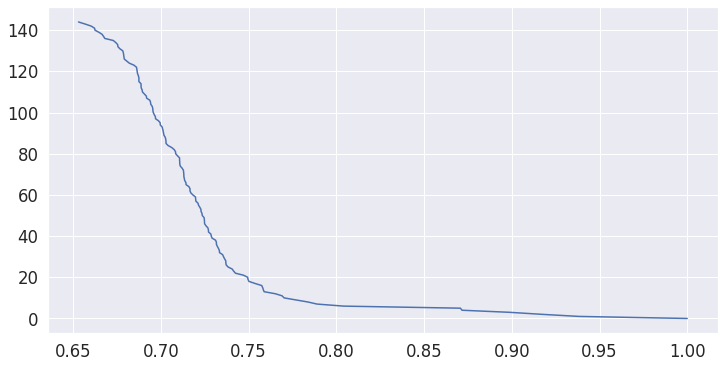



---------------------------------------------------------------
Doc 33
---------------------------------------------------------------
[0.9159944, 0.9012898, 0.89900416, 0.88546187, 0.8760732, 0.86816174, 0.86307263, 0.861099, 0.8591, 0.8572896, 0.85544544, 0.8552929, 0.8546409, 0.85379934, 0.85312355, 0.8518262, 0.8489434, 0.84710294, 0.8461931, 0.8403367, 0.839211, 0.83887565, 0.8384102, 0.8369013, 0.8367439, 0.83553356, 0.8352362, 0.8349697, 0.83362305, 0.8296506, 0.82895136, 0.8285363, 0.82741576, 0.826753, 0.82612985, 0.82508564, 0.82496715, 0.8230716, 0.82086486, 0.8201183, 0.8198046, 0.8196845, 0.8193989, 0.8188673, 0.8180495, 0.8150753, 0.814808, 0.81385875, 0.8123949, 0.8082448, 0.8079226, 0.8068516, 0.80624795, 0.80091816, 0.7998767, 0.79564, 0.7943721, 0.79366934, 0.79284906, 0.79271257, 0.7914443, 0.7909627, 0.78976107, 0.78952634, 0.788512, 0.7883562, 0.7850218, 0.7838861, 0.7831578, 0.7816572, 0.77951205, 0.7760515, 0.77408504, 0.7726176, 0.77001846, 0.76919836, 0.76729

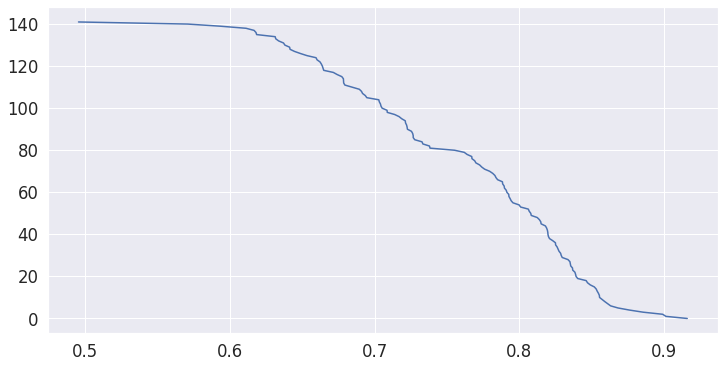

[0.9464456, 0.93463033, 0.8756677, 0.87281406, 0.8673214, 0.86536515, 0.8651773, 0.8574302, 0.85615593, 0.8553122, 0.8548657, 0.85228586, 0.8491542, 0.8490457, 0.84826744, 0.8467128, 0.84593093, 0.8441783, 0.8405893, 0.83959705, 0.8381674, 0.83663213, 0.83533466, 0.8344897, 0.8332451, 0.83256555, 0.8322847, 0.82992136, 0.8281388, 0.8281266, 0.82716787, 0.8256926, 0.8238532, 0.8235716, 0.8233471, 0.82157284, 0.8215419, 0.8211993, 0.81930125, 0.8190092, 0.81835866, 0.81834096, 0.8117008, 0.81143856, 0.81112087, 0.80958706, 0.80877376, 0.80872935, 0.80657357, 0.8049359, 0.80410874, 0.80234706, 0.8017225, 0.80145335, 0.8011477, 0.799836, 0.799435, 0.7987415, 0.7975927, 0.7966393, 0.7955195, 0.79480207, 0.79357815, 0.7931541, 0.7927205, 0.79229045, 0.79188406, 0.789155, 0.7886176, 0.7878687, 0.7864614, 0.7858268, 0.7851894, 0.78141195, 0.78102183, 0.778417, 0.7780452, 0.77590966, 0.7748635, 0.7736825, 0.767771, 0.7671651, 0.7668505, 0.7667674, 0.7615706, 0.75989205, 0.7565813, 0.7549009, 0.

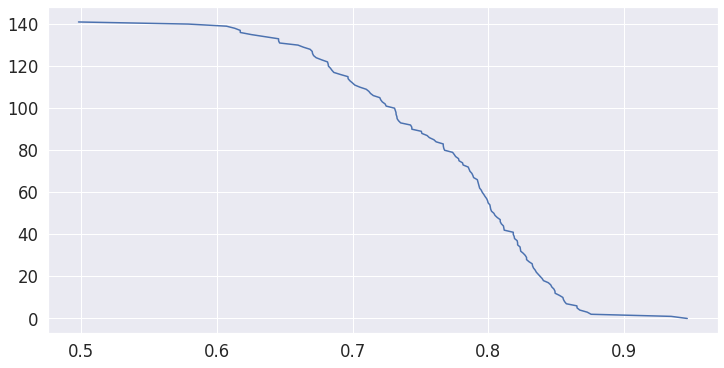

[0.99999994, 0.93774444, 0.8916599, 0.8735621, 0.8683078, 0.86644113, 0.8663381, 0.8646563, 0.8620659, 0.8606937, 0.85800993, 0.85784954, 0.8565372, 0.8564822, 0.8545303, 0.85279703, 0.8522589, 0.85162675, 0.8515063, 0.8503666, 0.8498086, 0.84605473, 0.84411526, 0.8373753, 0.8373611, 0.8367013, 0.83543694, 0.83519506, 0.8285565, 0.8266814, 0.82595193, 0.82508063, 0.82040966, 0.8198359, 0.81912553, 0.81859833, 0.8151536, 0.8151361, 0.8151244, 0.81211716, 0.81194425, 0.8105614, 0.8101546, 0.81006557, 0.8098338, 0.8084975, 0.8083687, 0.8077729, 0.8076662, 0.80766237, 0.8074306, 0.8067038, 0.80451006, 0.80266666, 0.8019818, 0.8012005, 0.7998692, 0.7981875, 0.796219, 0.7959523, 0.7943839, 0.7943646, 0.79405963, 0.7925803, 0.79235226, 0.7915617, 0.7910329, 0.7898096, 0.7872615, 0.7869871, 0.78695524, 0.7856195, 0.7851428, 0.7831613, 0.7801733, 0.7790543, 0.777685, 0.77682394, 0.7753753, 0.77491236, 0.7734009, 0.7728148, 0.7726975, 0.7721801, 0.76394975, 0.76348245, 0.7633492, 0.76207095, 0.7

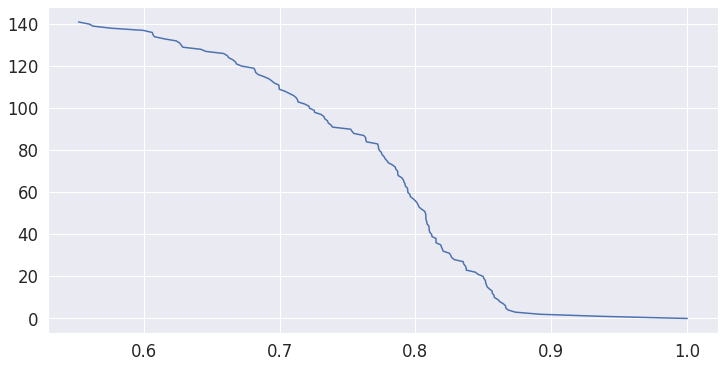



---------------------------------------------------------------
Doc 34
---------------------------------------------------------------
[1.0000002, 0.9274944, 0.8853563, 0.8831514, 0.87184715, 0.86775804, 0.86181444, 0.8569204, 0.8359628, 0.83118045, 0.8229164, 0.8187821, 0.81822765, 0.8180046, 0.81063116, 0.7970234, 0.7965599, 0.79554087, 0.79001915, 0.78895676, 0.7870642, 0.7862682, 0.7856892, 0.7856504, 0.7854411, 0.78313035, 0.78264827, 0.77917284, 0.7747724, 0.77321786, 0.7724397, 0.7711011, 0.7709298, 0.7696272, 0.76710665, 0.7669834, 0.76561177, 0.7656106, 0.76481426, 0.76413035, 0.7633623, 0.76321477, 0.7631432, 0.7627894, 0.76134133, 0.7604669, 0.75897646, 0.7576201, 0.7562142, 0.75604177, 0.7555095, 0.753965, 0.753598, 0.7535492, 0.75339127, 0.7515142, 0.74950516, 0.74903077, 0.7485304, 0.74670553, 0.74099004, 0.7406359, 0.7402989, 0.7399827, 0.73878706, 0.7387157, 0.73866796, 0.7365241, 0.7363447, 0.73374283, 0.7321861, 0.73169893, 0.7311461, 0.7302612, 0.7302416, 0.7297174

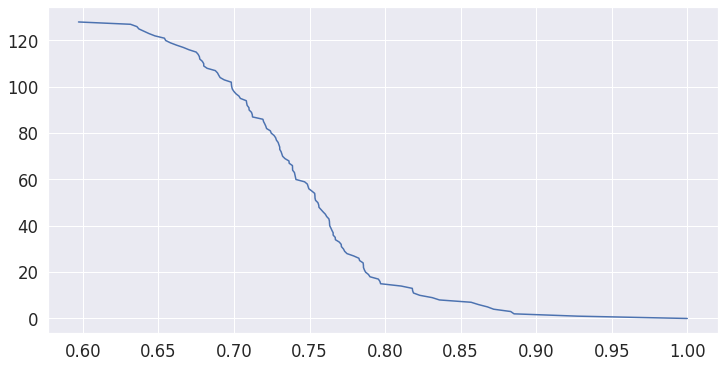



---------------------------------------------------------------
Doc 38
---------------------------------------------------------------
[0.99999976, 0.9033787, 0.90124726, 0.90105665, 0.89724004, 0.89232695, 0.8883435, 0.8859756, 0.8742352, 0.85667074, 0.85380244, 0.8481762, 0.84708303, 0.83483344, 0.81125975, 0.8111636, 0.81071013, 0.8095423, 0.80785936, 0.8062241, 0.8051554, 0.80500597, 0.8045644, 0.80377686, 0.80253553, 0.8022988, 0.80125934, 0.79740953, 0.7957132, 0.79413116, 0.792591, 0.7924096, 0.7923167, 0.79173046, 0.7912199, 0.79042023, 0.79000795, 0.78938794, 0.7892128, 0.78801465, 0.7856324, 0.78534544, 0.78441006, 0.78437793, 0.7842847, 0.78423655, 0.7837663, 0.7829729, 0.7823692, 0.782254, 0.78071225, 0.7805851, 0.7796822, 0.77932656, 0.779232, 0.7776239, 0.77730596, 0.77728164, 0.7770968, 0.77693903, 0.7759368, 0.7756329, 0.7754761, 0.7754512, 0.7752275, 0.7750287, 0.7737582, 0.77367, 0.7734984, 0.7730672, 0.772866, 0.77200025, 0.77111065, 0.76913166, 0.7690438, 0.768750

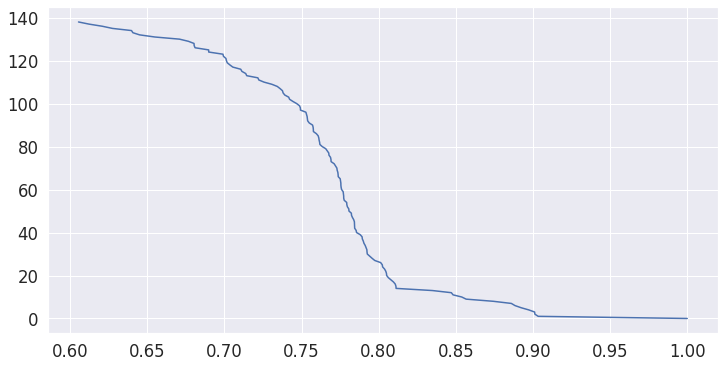



---------------------------------------------------------------
Doc 47
---------------------------------------------------------------
[1.0, 0.9630358, 0.95870256, 0.94972193, 0.93706876, 0.92816764, 0.92139983, 0.9190326, 0.9183451, 0.917485, 0.9167295, 0.9084418, 0.9054527, 0.8954942, 0.89445746, 0.89223444, 0.88163114, 0.88090074, 0.8678651, 0.864131, 0.8640029, 0.8634284, 0.8461347, 0.8459342, 0.84553665, 0.8417247, 0.8413352, 0.84039855, 0.8386017, 0.8382461, 0.83697844, 0.8357769, 0.83553857, 0.8353381, 0.8341377, 0.8328488, 0.83252096, 0.83100605, 0.8309114, 0.83027196, 0.8302409, 0.8298772, 0.82861745, 0.82747006, 0.8273412, 0.8263447, 0.8263246, 0.82581484, 0.82560945, 0.82522655, 0.82511824, 0.8250346, 0.82497954, 0.8246751, 0.8245357, 0.82443774, 0.82243645, 0.82231426, 0.82027006, 0.8202172, 0.81941843, 0.8194051, 0.81910515, 0.8190906, 0.8190167, 0.8189217, 0.8185295, 0.8185233, 0.8181988, 0.81816566, 0.8178416, 0.817515, 0.81481665, 0.8146622, 0.8130332, 0.812704, 0.812

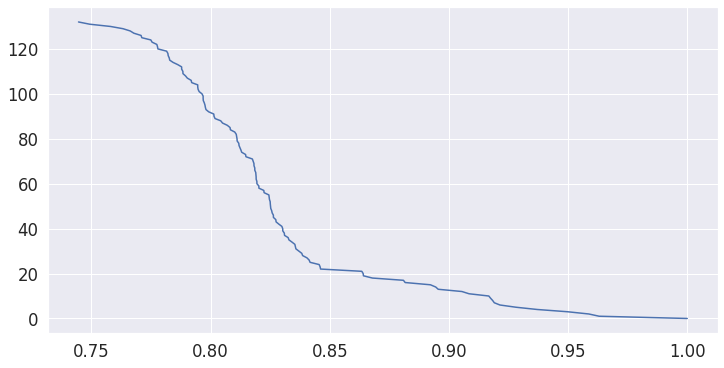



---------------------------------------------------------------
Doc 48
---------------------------------------------------------------
[1.0000002, 0.9527922, 0.94351935, 0.94255984, 0.94113547, 0.929463, 0.9288024, 0.92846423, 0.9167697, 0.91551864, 0.91248685, 0.9123317, 0.91103244, 0.91063696, 0.9099687, 0.9077815, 0.90767765, 0.90711594, 0.9056332, 0.9027722, 0.90188885, 0.8992361, 0.8990833, 0.8986336, 0.8984218, 0.89655113, 0.8963876, 0.8963555, 0.89609957, 0.89551616, 0.89366573, 0.89316857, 0.88768274, 0.88722146, 0.8867469, 0.88672537, 0.8832494, 0.88267213, 0.8820906, 0.8785725, 0.8765063, 0.8743993, 0.87406296, 0.8739841, 0.8733903, 0.8724396, 0.8713423, 0.8686913, 0.86862713, 0.86843956, 0.8672542, 0.8670483, 0.8666569, 0.8656473, 0.8646872, 0.86042506, 0.85969174, 0.85915905, 0.85764074, 0.85732484, 0.856786, 0.855548, 0.85543287, 0.854077, 0.85223806, 0.8515209, 0.8493514, 0.84731865, 0.8445022, 0.84440213, 0.84346837, 0.8429562, 0.8363846, 0.83556896, 0.83335567, 0.8330

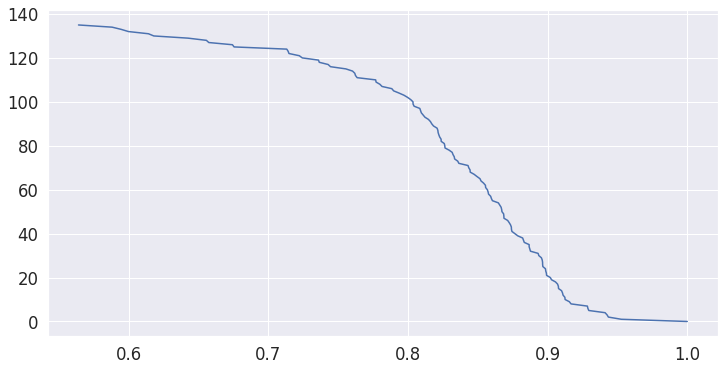



---------------------------------------------------------------
Doc 52
---------------------------------------------------------------
[0.9999999, 0.76060677, 0.52650464, 0.51391613, 0.49868283, 0.49439654, 0.4926371, 0.4888823, 0.4865963, 0.47885522, 0.47651613, 0.47518414, 0.47284883, 0.47056848, 0.4397328, 0.4374976, 0.43690404, 0.42874223, 0.42768306, 0.4261955, 0.42380846, 0.4147607, 0.41290075, 0.4120723, 0.4027995, 0.40176302, 0.40146515, 0.40095168, 0.39853317, 0.3939414, 0.39388943, 0.3923664, 0.39131734, 0.391142, 0.39002842, 0.38775474, 0.38695014, 0.3864723, 0.38397744, 0.38329643, 0.38244706, 0.3799644, 0.37818164, 0.3767746, 0.37616715, 0.37570995, 0.37014583, 0.369995, 0.36722445, 0.36355096, 0.3609016, 0.35884404, 0.35778874, 0.35762185, 0.35644454, 0.35451165, 0.35431743, 0.35382268, 0.3528969, 0.3527143, 0.35088676, 0.34933478, 0.3467438, 0.3463229, 0.34629267, 0.34316596, 0.34264728, 0.34158766, 0.33884603, 0.33330107, 0.33155534, 0.33037925, 0.3298763, 0.328206, 0

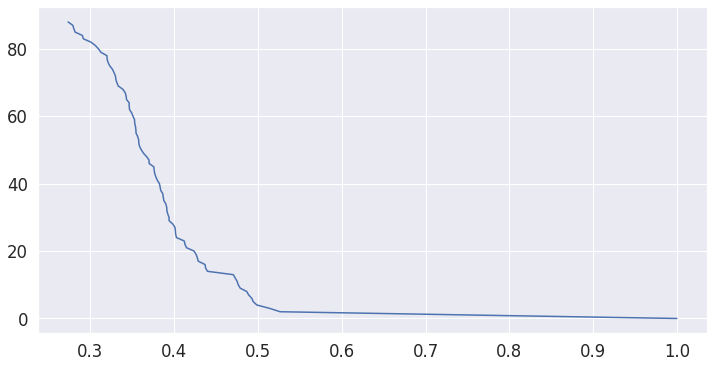



---------------------------------------------------------------
Doc 55
---------------------------------------------------------------
[1.0000001, 0.9777549, 0.96400154, 0.95485675, 0.9437538, 0.8894552, 0.8855713, 0.88502914, 0.8836827, 0.87901133, 0.8790068, 0.87837386, 0.8762478, 0.8761275, 0.87537646, 0.8751037, 0.87489665, 0.87310493, 0.87189317, 0.8718199, 0.8703116, 0.8691002, 0.8673183, 0.8671448, 0.8661731, 0.8655505, 0.8639209, 0.8630073, 0.86182076, 0.86094236, 0.85919267, 0.85898346, 0.8583043, 0.8582853, 0.8570429, 0.8560636, 0.8557531, 0.8553136, 0.85492706, 0.8548473, 0.85370064, 0.8526644, 0.8523902, 0.85227656, 0.8519687, 0.8507098, 0.8500974, 0.8500259, 0.848209, 0.8477566, 0.8476624, 0.8475687, 0.84744483, 0.8473811, 0.8465158, 0.84533465, 0.84517634, 0.8439822, 0.84290504, 0.84210014, 0.8420306, 0.8409587, 0.8406604, 0.8402571, 0.84023774, 0.84012115, 0.83901274, 0.83822614, 0.837808, 0.83748925, 0.83730656, 0.83666635, 0.83637524, 0.83596903, 0.83494854, 0.834403

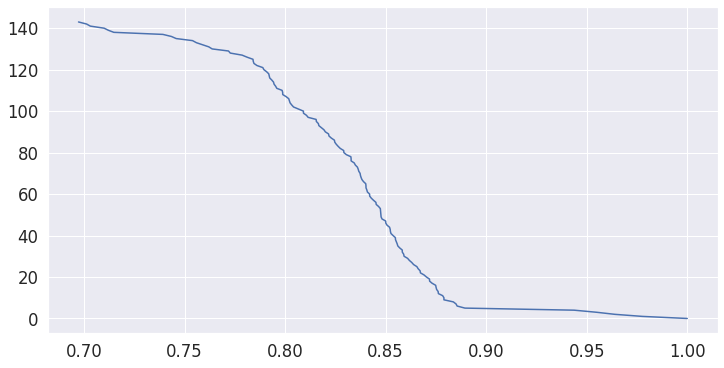



---------------------------------------------------------------
Doc 61
---------------------------------------------------------------
[0.918813, 0.91550183, 0.91403985, 0.90629756, 0.9058091, 0.9028854, 0.8940505, 0.88625646, 0.8839755, 0.87668425, 0.8735973, 0.8717501, 0.8705887, 0.8693059, 0.8690716, 0.86872387, 0.866791, 0.86536795, 0.8630098, 0.862918, 0.86224043, 0.8618322, 0.85911334, 0.85863924, 0.8570709, 0.8555348, 0.8542935, 0.8528337, 0.8508092, 0.8446357, 0.8437256, 0.84363365, 0.8412971, 0.8399713, 0.839575, 0.83898973, 0.8365396, 0.8358619, 0.83541286, 0.8344395, 0.8332294, 0.83097994, 0.8308238, 0.82908857, 0.8290017, 0.8264088, 0.8246138, 0.8235781, 0.8226922, 0.82025135, 0.81876236, 0.8179009, 0.8167372, 0.81661063, 0.81606925, 0.81490344, 0.8145435, 0.8141189, 0.8140614, 0.8088876, 0.80841887, 0.8061314, 0.8059981, 0.80574656, 0.80568564, 0.8054217, 0.80447745, 0.80109817, 0.79946613, 0.7986244, 0.7941458, 0.793979, 0.7939385, 0.7934781, 0.7926833, 0.78937685, 0.78

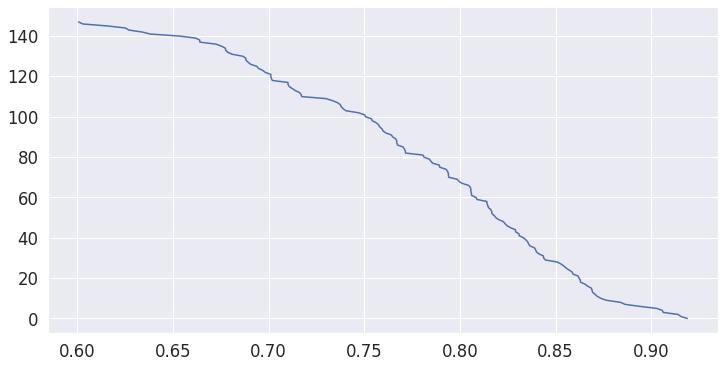

[1.0000001, 0.9126133, 0.9024894, 0.8999196, 0.8981168, 0.8923086, 0.88131297, 0.86230946, 0.86198866, 0.8591814, 0.8576608, 0.85649395, 0.85216415, 0.8507285, 0.8495868, 0.84730583, 0.8456046, 0.845208, 0.8442189, 0.84244895, 0.8410701, 0.8381457, 0.83691263, 0.83674216, 0.8348835, 0.8338861, 0.83328664, 0.8298495, 0.82817966, 0.8277715, 0.82654285, 0.82539946, 0.8253525, 0.8232477, 0.82269686, 0.82245666, 0.82169294, 0.8215272, 0.81905556, 0.818799, 0.8174534, 0.8165247, 0.81533575, 0.8146584, 0.8141457, 0.81404114, 0.8137039, 0.8108772, 0.81063354, 0.81028545, 0.80974424, 0.80858177, 0.80765045, 0.8073235, 0.80364746, 0.8025654, 0.80167365, 0.8011974, 0.80088025, 0.7995055, 0.7992387, 0.7979053, 0.7976944, 0.796548, 0.7958528, 0.794163, 0.7931417, 0.79199386, 0.7902185, 0.7893644, 0.7890302, 0.78841877, 0.7881185, 0.7880398, 0.78581506, 0.78521264, 0.784152, 0.7837143, 0.7826396, 0.7781714, 0.77799267, 0.77614856, 0.7728646, 0.7717669, 0.7717149, 0.7699286, 0.76351947, 0.7611488, 0.

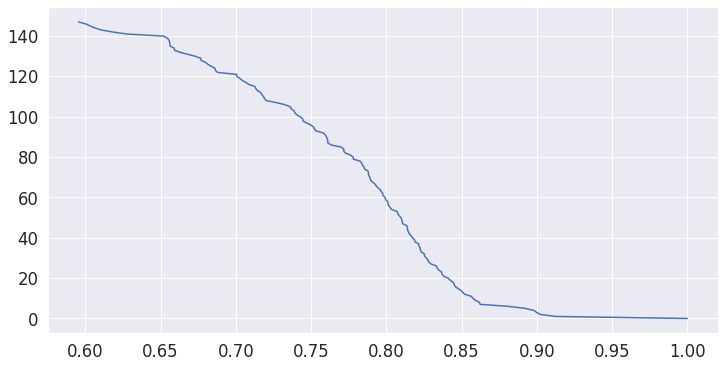



---------------------------------------------------------------
Doc 65
---------------------------------------------------------------
[0.9999999, 0.76889837, 0.7223244, 0.7054926, 0.6989198, 0.6804669, 0.66627586, 0.66477746, 0.6312724, 0.5886131, 0.56390405, 0.5555404, 0.5198088, 0.50440264, 0.503863, 0.50159585, 0.48767543, 0.46815827, 0.46428314, 0.4607834, 0.45373777, 0.45331013, 0.4409027, 0.41118932, 0.4107337, 0.3917527, 0.3910695, 0.3894794, 0.38713163, 0.3788103, 0.37457502, 0.3667431, 0.3424037, 0.26144603]


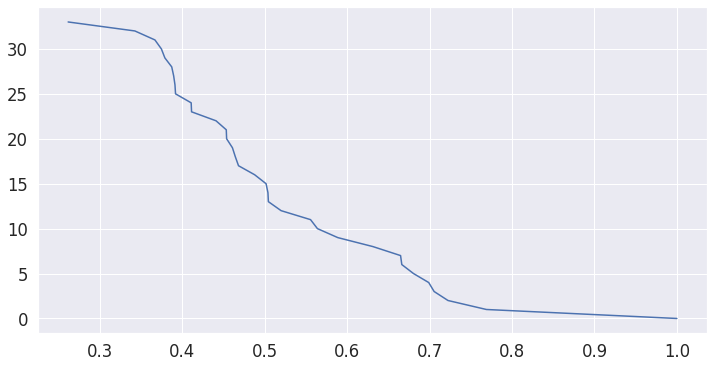



---------------------------------------------------------------
Doc 68
---------------------------------------------------------------
[0.57640404, 0.5467522, 0.54079795, 0.4766632, 0.4489549, 0.4260785, 0.40387312, 0.40117338, 0.38879472, 0.38627684, 0.374983, 0.37107342, 0.3706413, 0.36092502, 0.3558653, 0.34970436, 0.3388393, 0.3350541, 0.32205957, 0.31782973, 0.31458578, 0.3080085, 0.30690867, 0.30414402, 0.3039, 0.30123895, 0.29980153, 0.2987944, 0.29777926, 0.29333693, 0.293329, 0.27971047, 0.27791542, 0.2745064, 0.2701651, 0.24676898, 0.24675971, 0.24308021, 0.24241918, 0.24235092, 0.2421684, 0.24198294, 0.24169862, 0.23794639, 0.2377375, 0.22849178, 0.22397196, 0.22361436, 0.22074345, 0.22039512, 0.21897285, 0.21856025, 0.21316296, 0.20830305, 0.20739722, 0.20638308, 0.20572998, 0.20430216, 0.20385383, 0.20174637, 0.20102516, 0.19936751, 0.19735608, 0.19192839, 0.1818144, 0.17875537, 0.17855155, 0.17810497, 0.17655194, 0.17014477, 0.16899043, 0.16748923, 0.16735034, 0.1652171

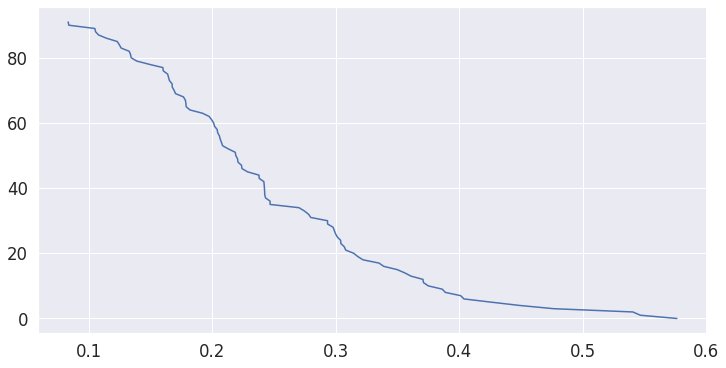

[0.8459712, 0.6417589, 0.6286704, 0.6241571, 0.6239005, 0.59031475, 0.5474384, 0.5378932, 0.52807266, 0.52788466, 0.52758, 0.5243684, 0.51322764, 0.51207525, 0.510586, 0.5086585, 0.50433, 0.5029824, 0.5018344, 0.50111115, 0.4937107, 0.49323484, 0.49258906, 0.48637474, 0.48230553, 0.48177665, 0.4817564, 0.48146382, 0.47127253, 0.4706179, 0.46998534, 0.46975935, 0.45977002, 0.4594499, 0.45674235, 0.45648855, 0.4522735, 0.45078182, 0.44974804, 0.448045, 0.44645506, 0.44620663, 0.44088522, 0.44085485, 0.43873286, 0.43827376, 0.43711066, 0.43653968, 0.42965472, 0.42941818, 0.42670414, 0.42578763, 0.42517617, 0.42391628, 0.42351347, 0.42244864, 0.422127, 0.41859794, 0.4168099, 0.41598073, 0.41514906, 0.4144015, 0.41235048, 0.4105338, 0.40892375, 0.40700704, 0.40602818, 0.4031434, 0.40302873, 0.4006114, 0.39938653, 0.38963944, 0.3896081, 0.3861668, 0.3851541, 0.38510743, 0.38322705, 0.38146967, 0.3803419, 0.37711293, 0.37648863, 0.36083454, 0.36055595, 0.35304457, 0.35230798, 0.35223666, 0.34

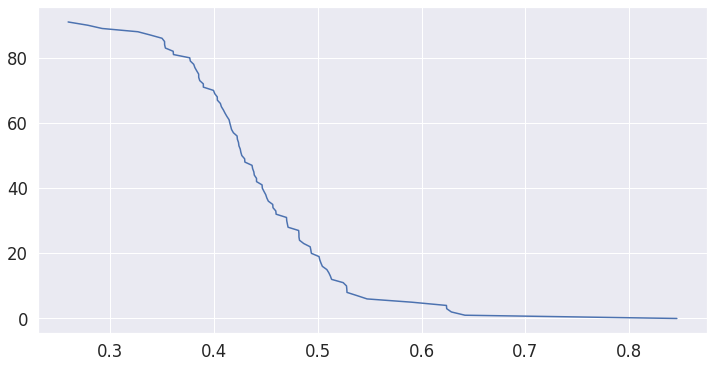

[0.99999994, 0.72982216, 0.70313764, 0.6963755, 0.682145, 0.6751485, 0.67051023, 0.626421, 0.60948145, 0.6066954, 0.60008955, 0.59390265, 0.59313977, 0.59269655, 0.5826359, 0.57707894, 0.5748029, 0.5744951, 0.5690788, 0.56805325, 0.5669068, 0.5525608, 0.54430985, 0.53715605, 0.5311043, 0.52877486, 0.52398956, 0.5213839, 0.52124614, 0.5191701, 0.51872075, 0.51398623, 0.50707686, 0.50493544, 0.5029675, 0.5001662, 0.49916497, 0.49802196, 0.49763775, 0.48926494, 0.48163438, 0.48124814, 0.47842568, 0.47780335, 0.46930176, 0.46860743, 0.46780616, 0.4668935, 0.46408734, 0.46124154, 0.45389628, 0.45152903, 0.44784045, 0.4432196, 0.4427272, 0.4405347, 0.43919754, 0.4276254, 0.42383665, 0.42337513, 0.42089754, 0.42071894, 0.4175481, 0.40859258, 0.40805727, 0.40735504, 0.4046643, 0.39935726, 0.3992334, 0.39649868, 0.39614743, 0.39144346, 0.3904132, 0.3891346, 0.38708046, 0.38579643, 0.3844815, 0.38436058, 0.3825885, 0.38209718, 0.3814828, 0.379623, 0.3784634, 0.37482363, 0.36798888, 0.35435212, 0

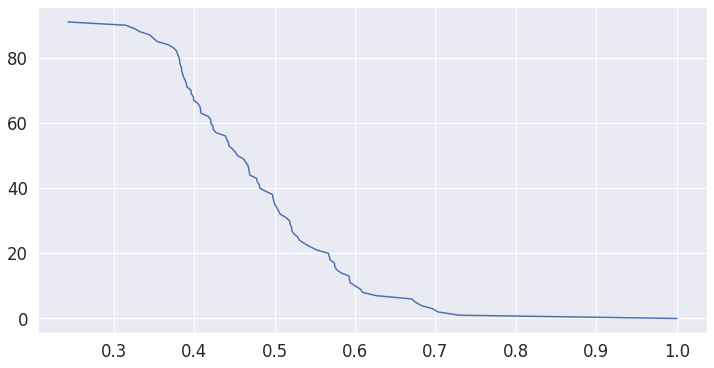



---------------------------------------------------------------
Doc 72
---------------------------------------------------------------
[0.95653695, 0.9282494, 0.9265643, 0.9042233, 0.9032923, 0.8998056, 0.8981542, 0.886447, 0.88553476, 0.8847883, 0.88371766, 0.8816687, 0.8805299, 0.8787465, 0.8723366, 0.8718001, 0.87137705, 0.87046254, 0.8695756, 0.86871064, 0.8677541, 0.8674245, 0.86358064, 0.8634356, 0.8628011, 0.86232567, 0.8614136, 0.8583244, 0.8562995, 0.85476345, 0.84894246, 0.8472619, 0.8464812, 0.84535646, 0.84314877, 0.8383486, 0.83731395, 0.83588696, 0.8350916, 0.8344395, 0.83326364, 0.8323019, 0.8311043, 0.83007383, 0.8277452, 0.8277371, 0.8240587, 0.82380265, 0.82378805, 0.82358444, 0.82348037, 0.82313883, 0.82300365, 0.8217684, 0.81874907, 0.8187177, 0.818099, 0.8172132, 0.81599283, 0.81546694, 0.8142831, 0.8125892, 0.81202114, 0.8110962, 0.8098915, 0.8096647, 0.80601823, 0.80485713, 0.80485606, 0.8045255, 0.8044429, 0.8041489, 0.80266213, 0.8019314, 0.8014059, 0.8012899

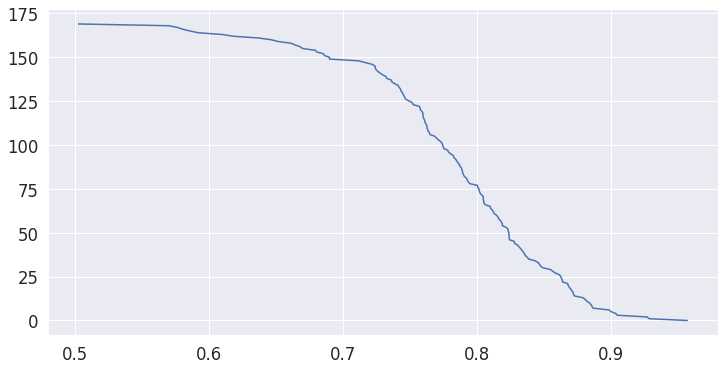

[1.0, 0.94574714, 0.93306446, 0.89055586, 0.8860615, 0.8839095, 0.8755449, 0.87457097, 0.87067443, 0.8700471, 0.8678052, 0.8623508, 0.8613821, 0.8611196, 0.8599775, 0.8598378, 0.85748875, 0.85508025, 0.85124296, 0.8501736, 0.8491995, 0.84836686, 0.84492016, 0.84468526, 0.840065, 0.8379538, 0.8375771, 0.8356423, 0.83078766, 0.8299824, 0.8290467, 0.82820714, 0.8274945, 0.8265246, 0.8255259, 0.8253275, 0.8247026, 0.8234881, 0.8226974, 0.82164484, 0.82077163, 0.8206572, 0.81997025, 0.8178231, 0.81756496, 0.8174424, 0.81733567, 0.8172798, 0.8171934, 0.8170574, 0.81698424, 0.81685305, 0.8164271, 0.81630147, 0.8161926, 0.81617475, 0.81431884, 0.8133223, 0.81279707, 0.8119506, 0.8119321, 0.8114443, 0.8100791, 0.80906534, 0.8065065, 0.80569947, 0.8055139, 0.80539703, 0.8027743, 0.80120134, 0.8002989, 0.79935384, 0.79883754, 0.79800355, 0.79773927, 0.79742074, 0.7968461, 0.7962672, 0.7962227, 0.7952186, 0.7947172, 0.79395545, 0.79314923, 0.7929709, 0.7922164, 0.7918823, 0.79154885, 0.790239, 0.7

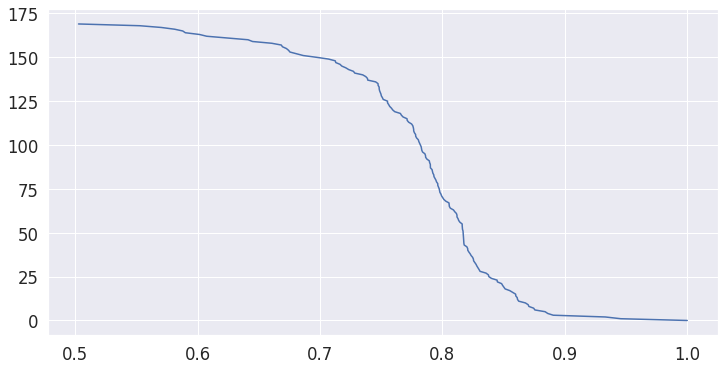



---------------------------------------------------------------
Doc 73
---------------------------------------------------------------
[1.0, 0.86714554, 0.86475253, 0.860115, 0.843068, 0.84162384, 0.84017575, 0.8376094, 0.83698773, 0.83457285, 0.83202875, 0.8241694, 0.8230226, 0.81948614, 0.81799704, 0.815257, 0.81458646, 0.81107056, 0.80735457, 0.80384886, 0.8038379, 0.80351025, 0.8022474, 0.79850364, 0.79492897, 0.7944633, 0.79135054, 0.79113346, 0.786913, 0.7756661, 0.775342, 0.7647332, 0.7614497, 0.75864327, 0.7558751, 0.7526331, 0.7455236, 0.7434313, 0.7421639, 0.74138844, 0.7339299, 0.73329234, 0.7203748, 0.71866965, 0.7182767, 0.7153497, 0.7109972, 0.7086809, 0.70848054, 0.6949316, 0.6892382, 0.6841536, 0.6776507, 0.6754353, 0.6752054, 0.6718407, 0.6678071, 0.66746676, 0.6631004, 0.65642184, 0.6538195, 0.6534777, 0.6448751, 0.6448707, 0.64446074, 0.6379634, 0.6315266, 0.6281796, 0.62347966, 0.60563815, 0.5949667, 0.5865134, 0.57749057, 0.5711776, 0.5705478, 0.570413, 0.5685717

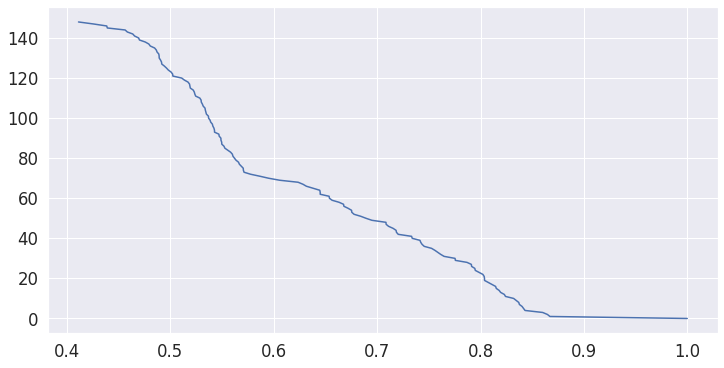



---------------------------------------------------------------
Doc 80
---------------------------------------------------------------
[1.0, 0.9275175, 0.9247107, 0.919658, 0.91736037, 0.91347504, 0.91015524, 0.90904486, 0.9035012, 0.8967283, 0.88769734, 0.8813946, 0.87943894, 0.87694883, 0.87452507, 0.8709098, 0.8693738, 0.8652804, 0.8642282, 0.8640293, 0.8636615, 0.8622643, 0.8617872, 0.86154985, 0.85820544, 0.8524118, 0.85238737, 0.8475579, 0.8443951, 0.8434654, 0.843163, 0.84120125, 0.83745944, 0.8371756, 0.83407336, 0.8338089, 0.8309607, 0.8302523, 0.8300964, 0.8298054, 0.8265119, 0.82365716, 0.81560546, 0.8119297, 0.80565596, 0.8028294, 0.80255604, 0.79872084, 0.79192454, 0.79099333, 0.7891053, 0.7887585, 0.78715336, 0.7818622, 0.7785481, 0.77845764, 0.7721859, 0.764081, 0.757483, 0.7531066, 0.73891187, 0.73822963, 0.7354648, 0.73106104, 0.71129966, 0.709702, 0.7090639, 0.7046816, 0.6829898, 0.6747135, 0.67393446, 0.6735399, 0.6712935, 0.66823316, 0.66477746, 0.6646338, 0.64683

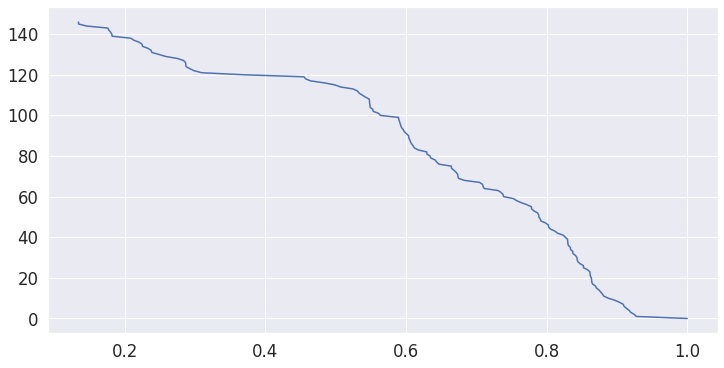



---------------------------------------------------------------
Doc 87
---------------------------------------------------------------
[1.0, 0.9153726, 0.8994588, 0.89591074, 0.88866556, 0.88671386, 0.8761667, 0.87124777, 0.8629209, 0.861307, 0.8602983, 0.8587773, 0.8553767, 0.8475925, 0.8409091, 0.84006464, 0.839384, 0.83713984, 0.8355423, 0.8343656, 0.83198506, 0.8235966, 0.8135809, 0.79917634, 0.7935016, 0.7815254, 0.7809614, 0.7681109, 0.76671827, 0.764024, 0.7629853, 0.7605176, 0.75920695, 0.7509753, 0.7493917, 0.7367451, 0.7346438, 0.7300637, 0.7209921, 0.7200459, 0.7157349, 0.70666647, 0.70466936, 0.68814045, 0.6859075, 0.683555, 0.68303746, 0.6825597, 0.6763749, 0.67219573, 0.6682583, 0.6640293, 0.6603116, 0.6575233, 0.6529192, 0.64725935, 0.6427826, 0.62304866, 0.6048666, 0.5988344, 0.59655213, 0.59596753, 0.5922186, 0.59052265, 0.5904002, 0.5876955, 0.5766844, 0.5740912, 0.5718345, 0.56656414, 0.56054384, 0.55787766, 0.55670834, 0.5503683, 0.5494878, 0.5455413, 0.54019094, 

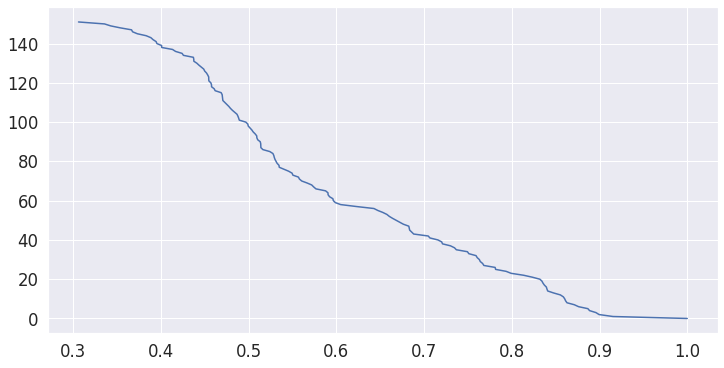



---------------------------------------------------------------
Doc 99
---------------------------------------------------------------
[1.0, 0.866532, 0.8219262, 0.8080884, 0.7821246, 0.7802017, 0.77116615, 0.74890983, 0.747803, 0.74083203, 0.7388091, 0.7386852, 0.737646, 0.7326237, 0.72149795, 0.71635056, 0.7158698, 0.7099706, 0.7094512, 0.7083876, 0.70306957, 0.7028147, 0.69503057, 0.6948268, 0.6908865, 0.6881095, 0.6879509, 0.6839733, 0.6810963, 0.6795655, 0.677987, 0.6725965, 0.67208743, 0.6716964, 0.6716954, 0.6715457, 0.6715261, 0.6697976, 0.669648, 0.6651819, 0.6646651, 0.6621554, 0.6616733, 0.6592332, 0.65863705, 0.6570262, 0.65641093, 0.65375185, 0.65322113, 0.6519342, 0.6503636, 0.6466497, 0.64252436, 0.6414494, 0.6409062, 0.6408833, 0.64071274, 0.6406952, 0.64016294, 0.6395293, 0.633384, 0.63212264, 0.6315652, 0.63018304, 0.6298209, 0.6288239, 0.6266231, 0.6251109, 0.62274146, 0.62227815, 0.61975646, 0.6175577, 0.61626405, 0.6150176, 0.6144898, 0.6140145, 0.61047745, 0.607

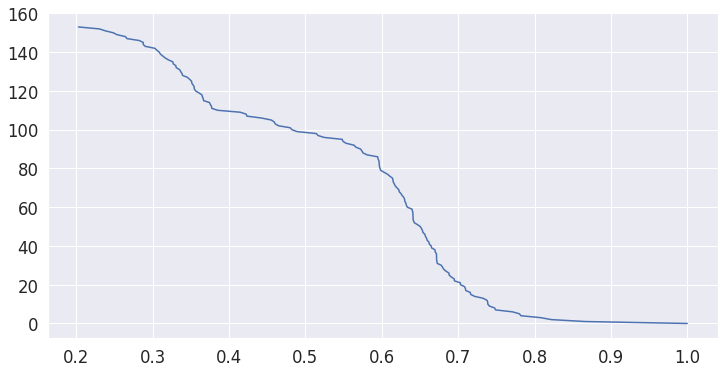

In [173]:
from scipy import stats
## generate the data and plot it for an ideal normal curve

for doc in list_doc_chosen_word:
  print('---------------------------------------------------------------')
  print('Doc {}'.format(doc))
  print('---------------------------------------------------------------')
  
  for word in dic_word_appearance[doc]:
    value_list = list()
    temp = sorted(find_similar(last_layer[doc], word,  tokenizer.tokenize(sentences[doc])).items(), key=lambda kv: kv[1], reverse=True)
    for d in temp:
      value_list.append(d[1])
      ## plot data
    print(value_list)
    plt.plot(value_list,range(0, len(value_list)))
    plt.show()
  print()
  print()

  

In [174]:
# show th t-SNE for the tokens
from sklearn.manifold import TSNE
def tsne_plot(sentences, output):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word, embed in zip(sentences, output):
        tokens.append(embed)
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

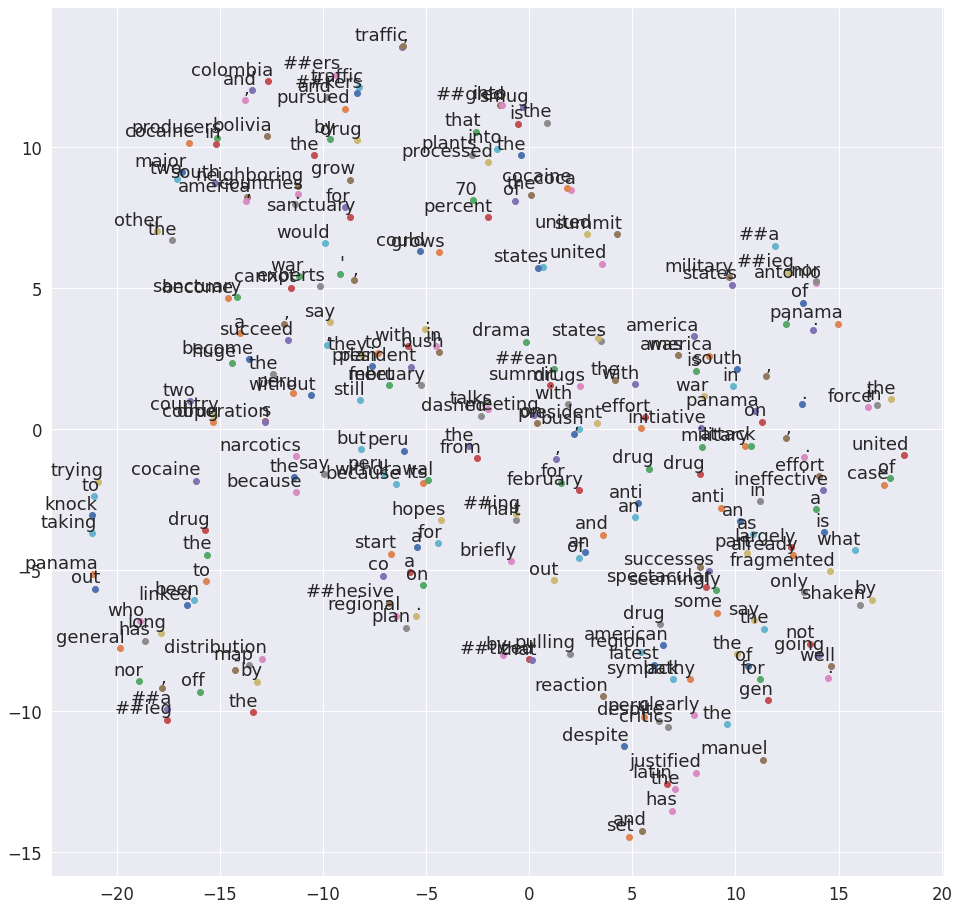

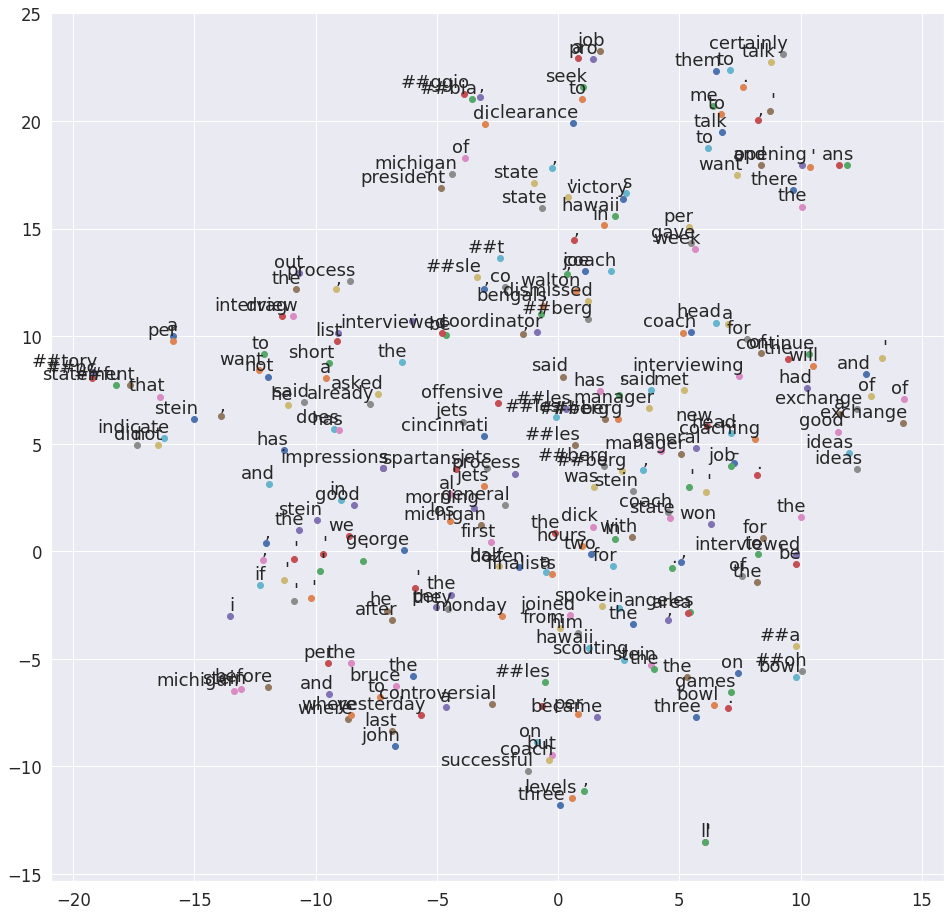

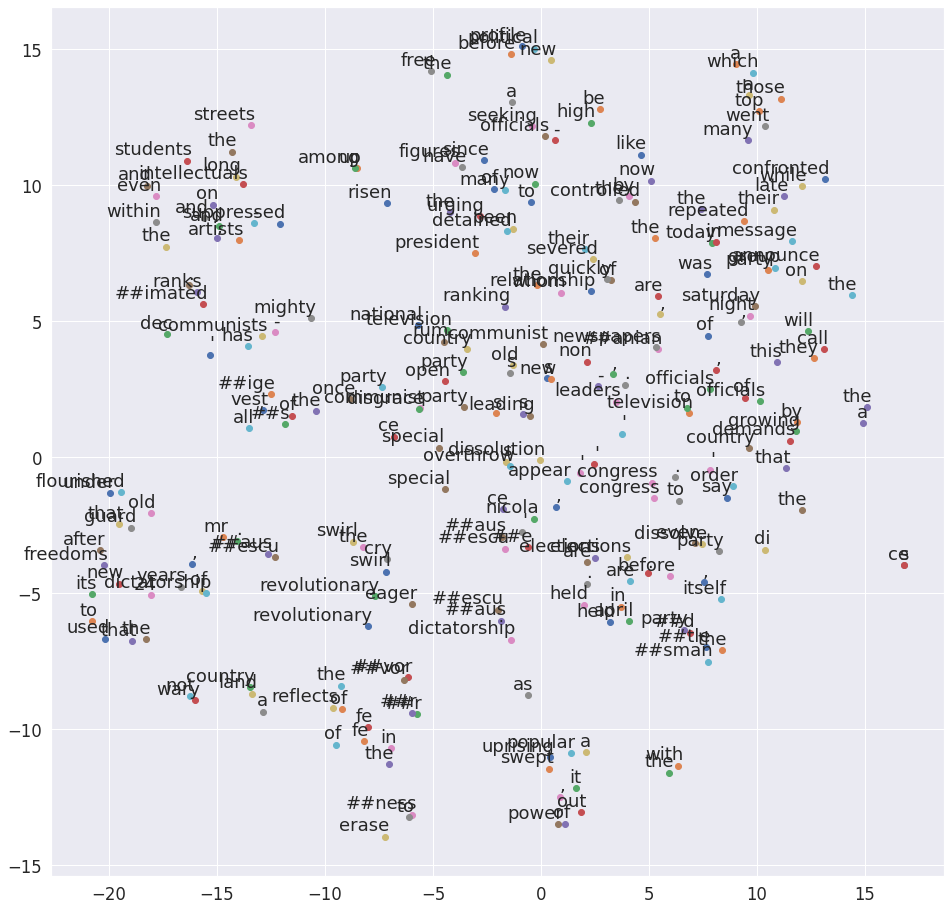

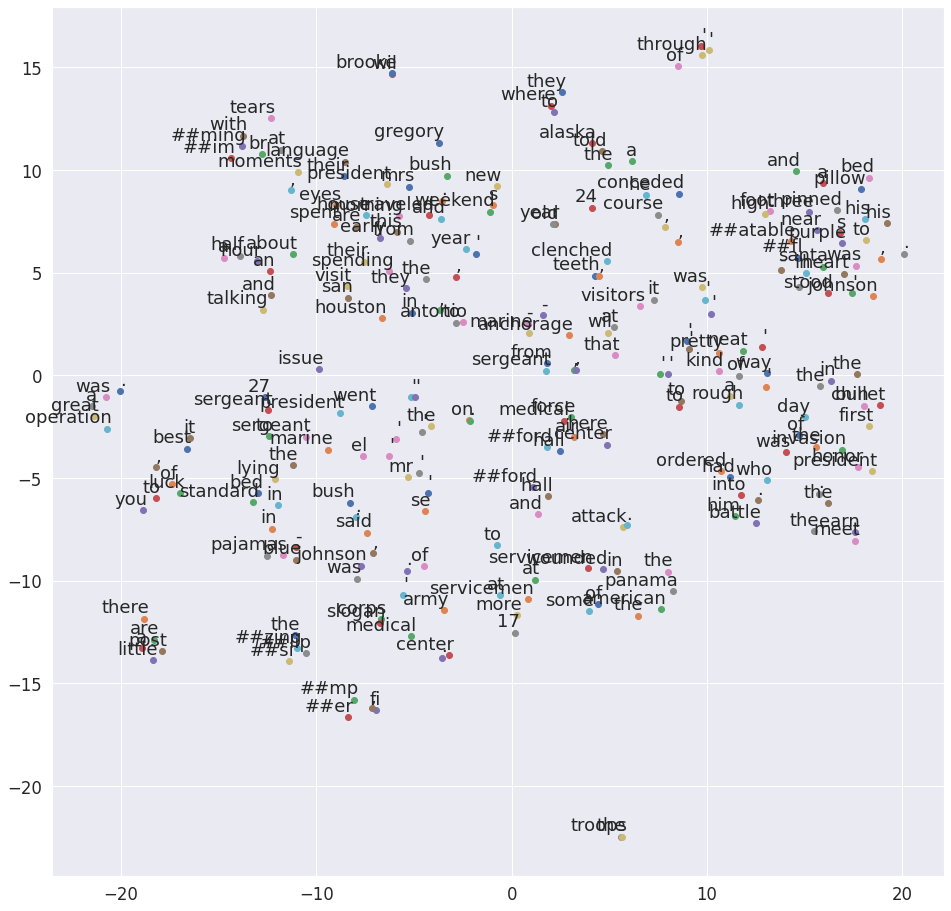

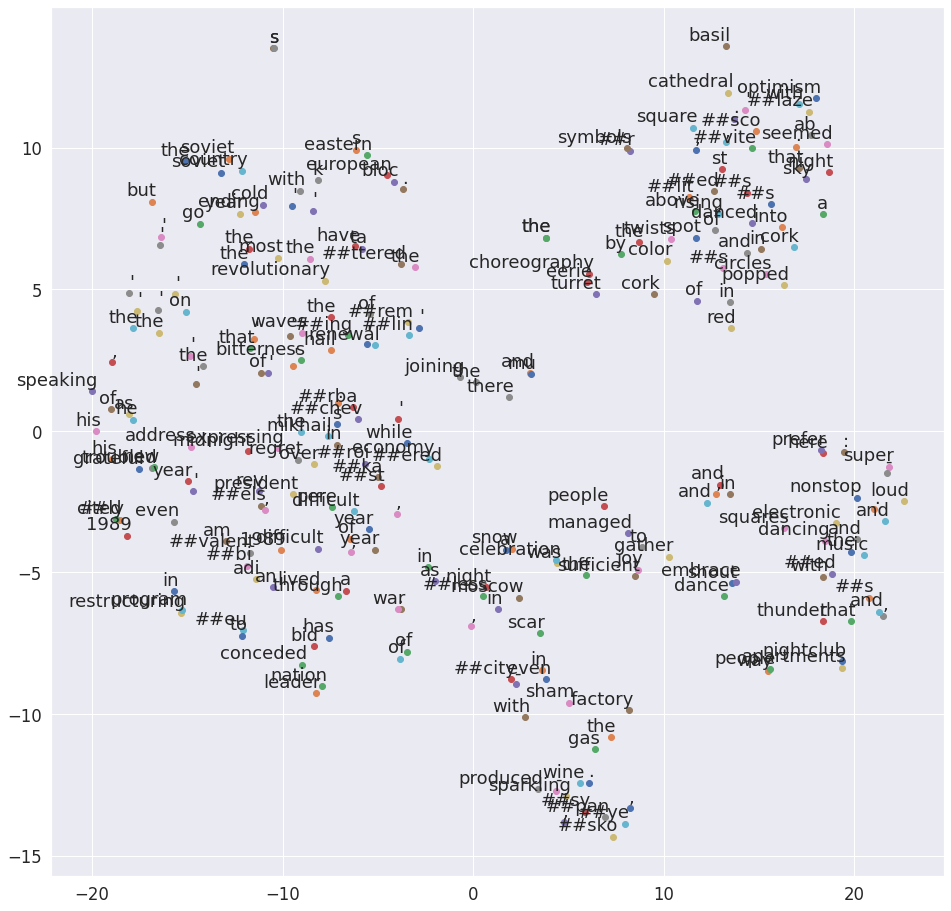

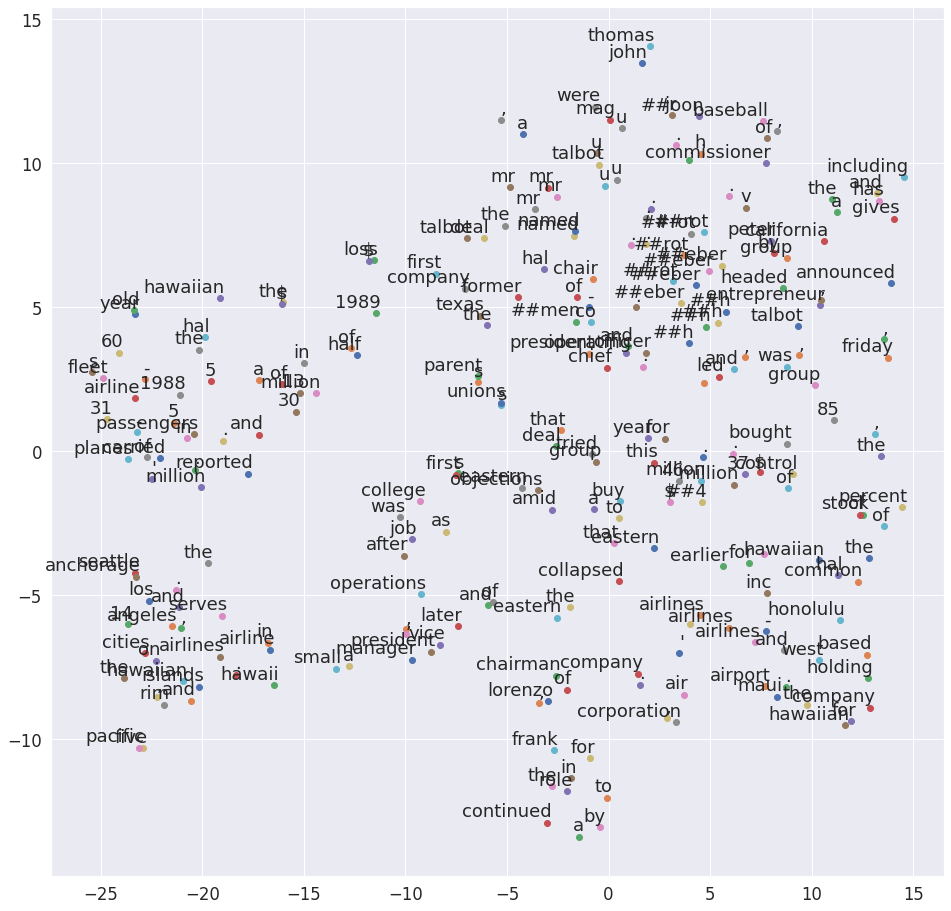

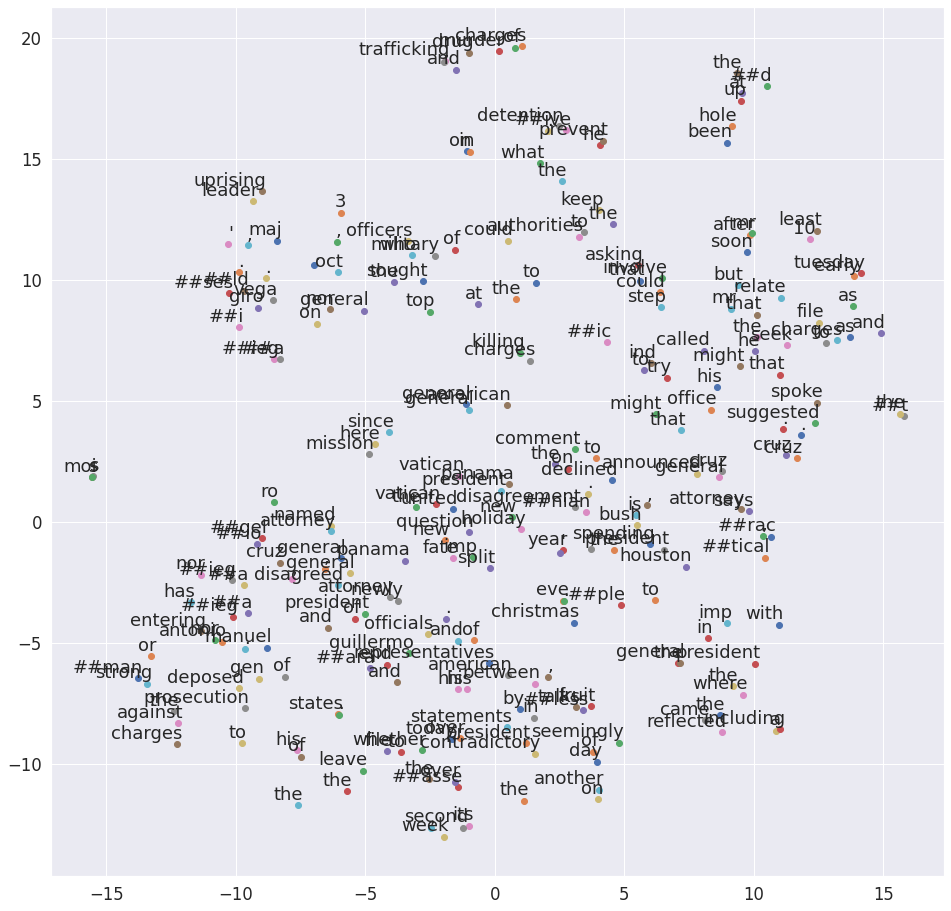

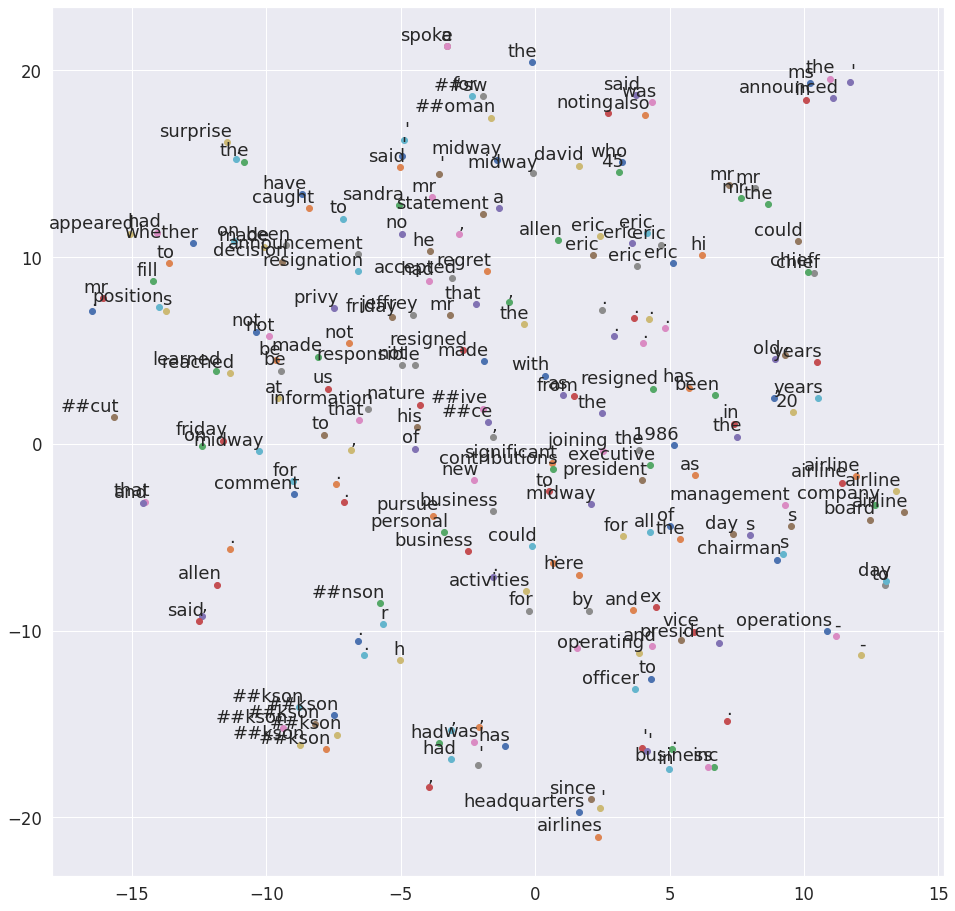

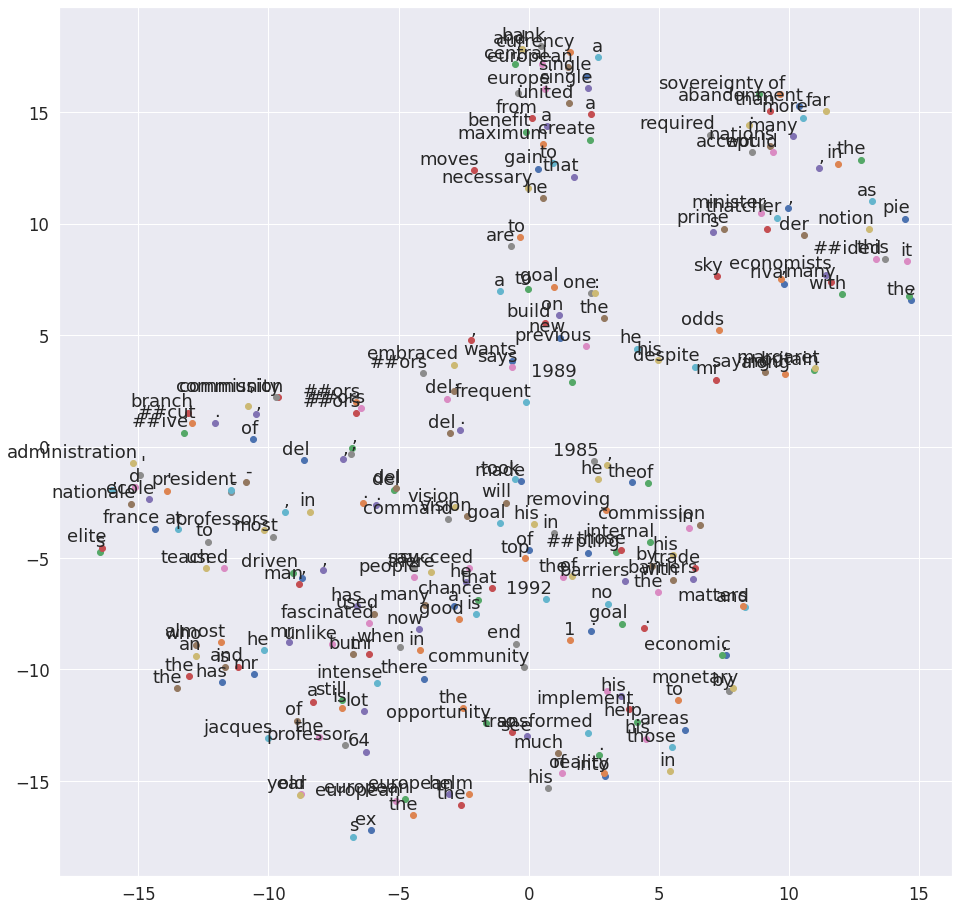

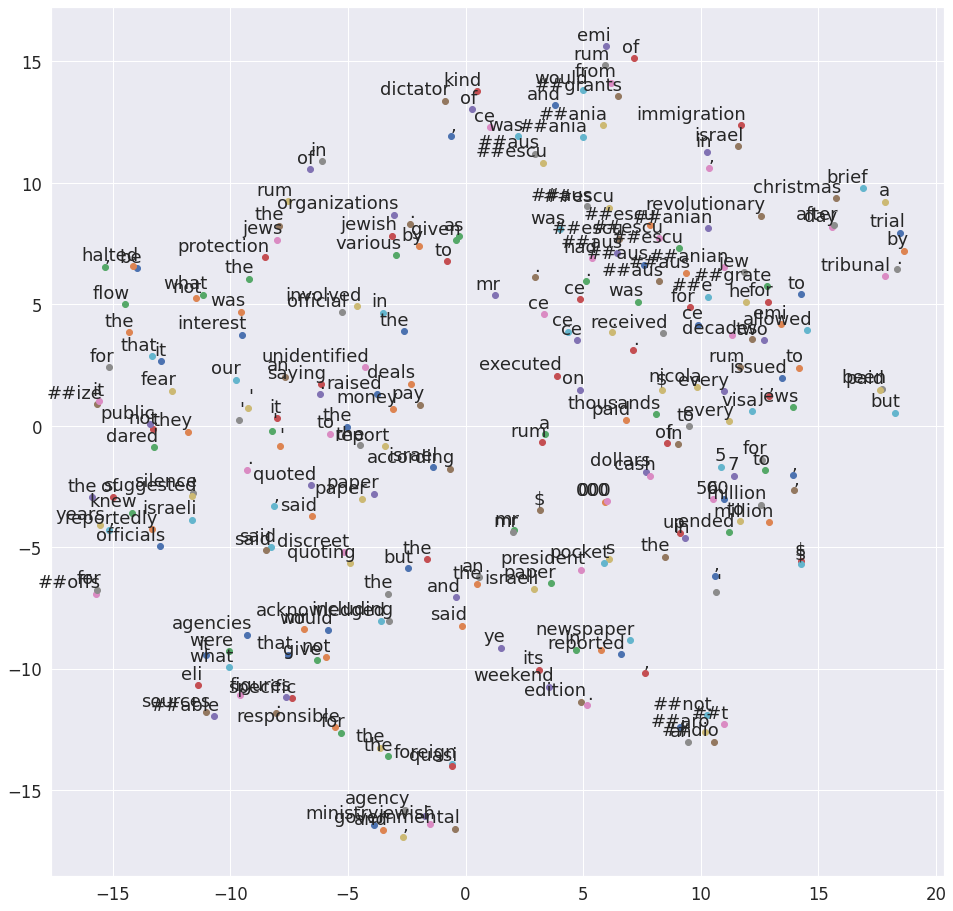

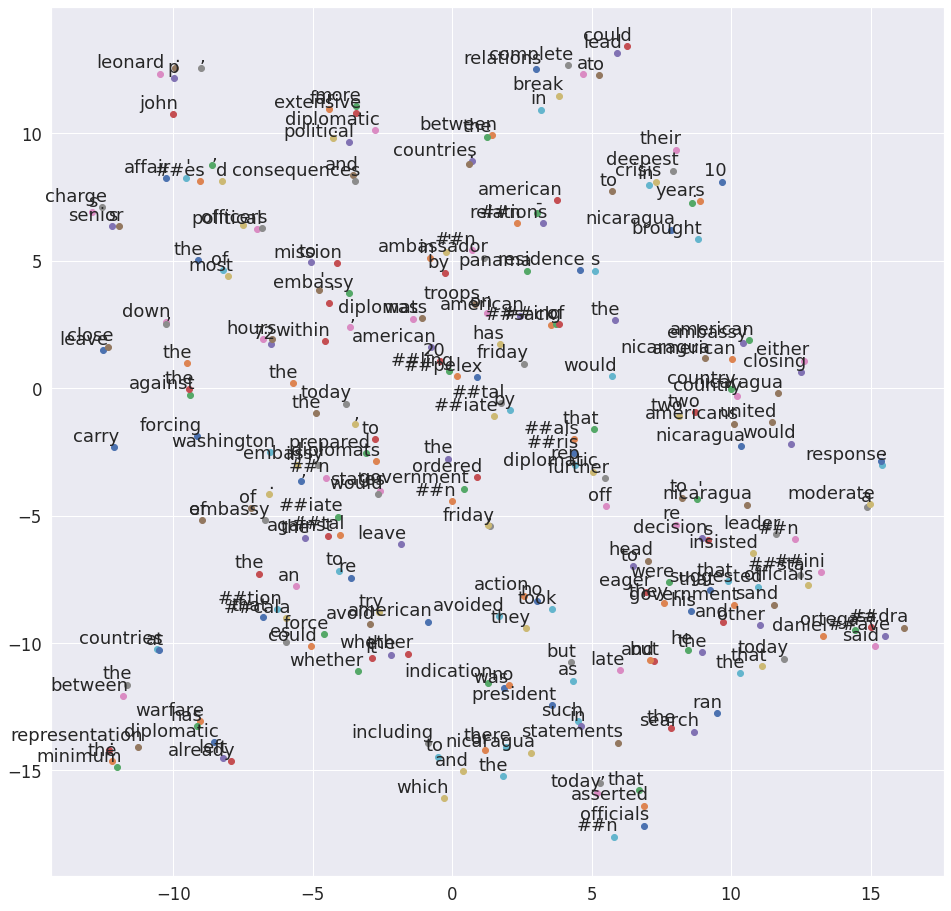

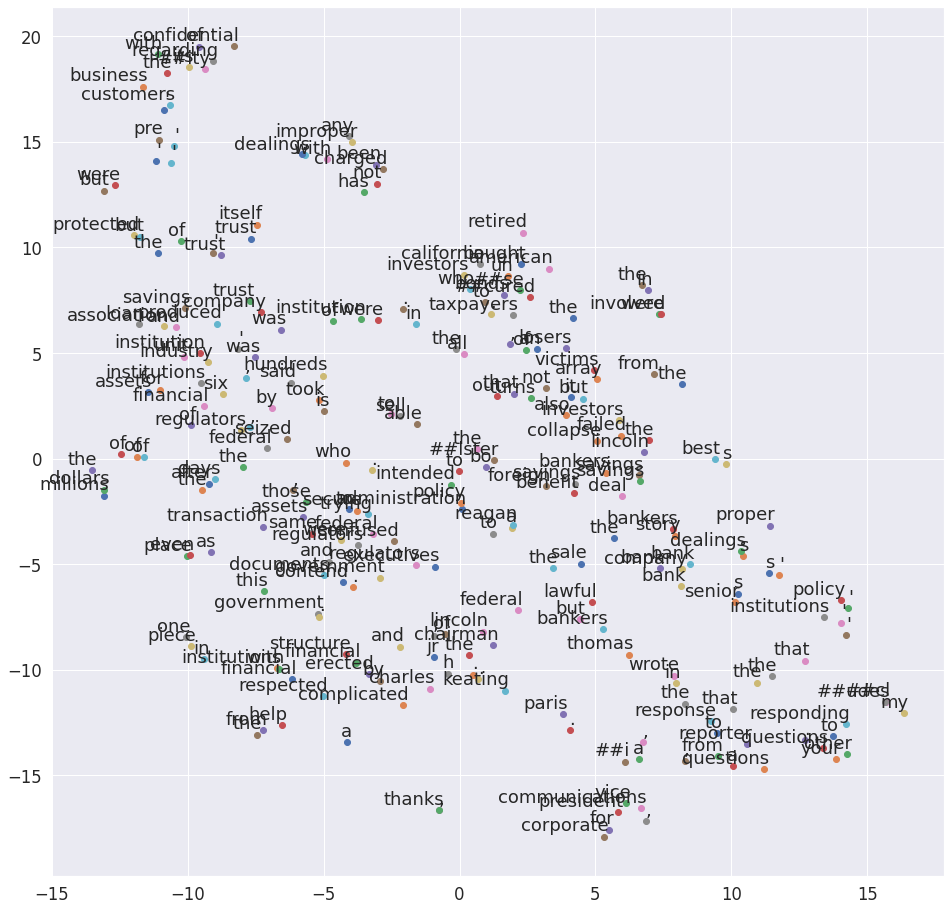

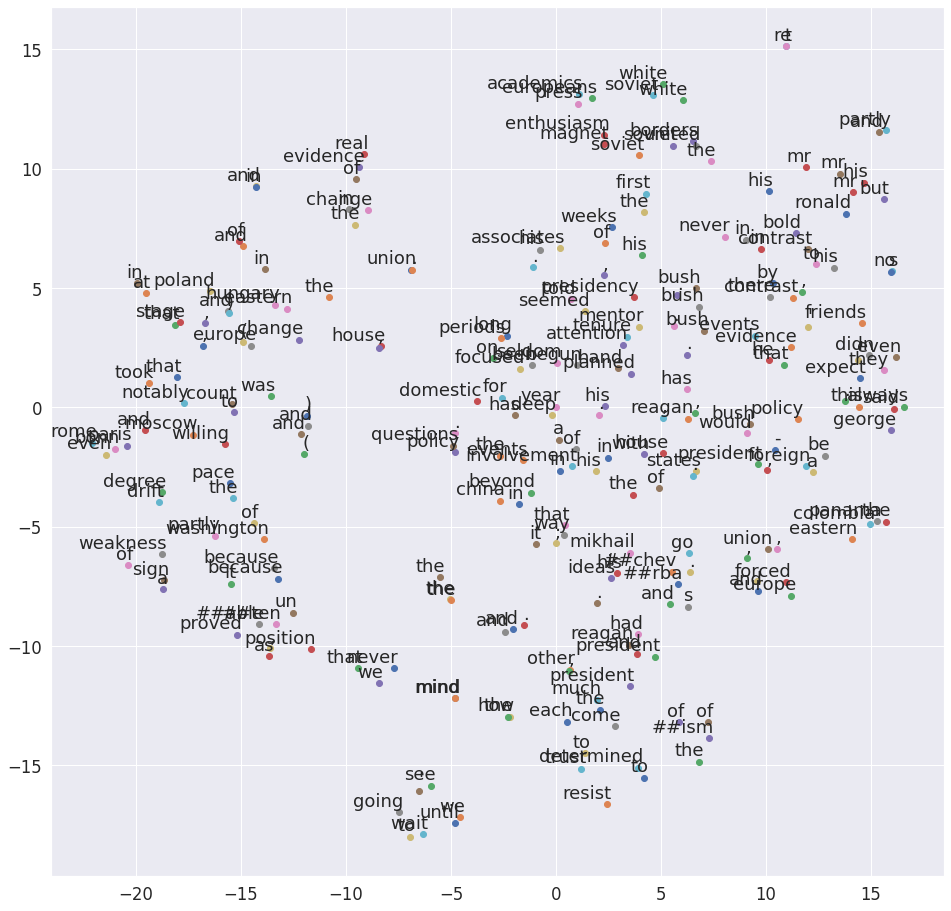

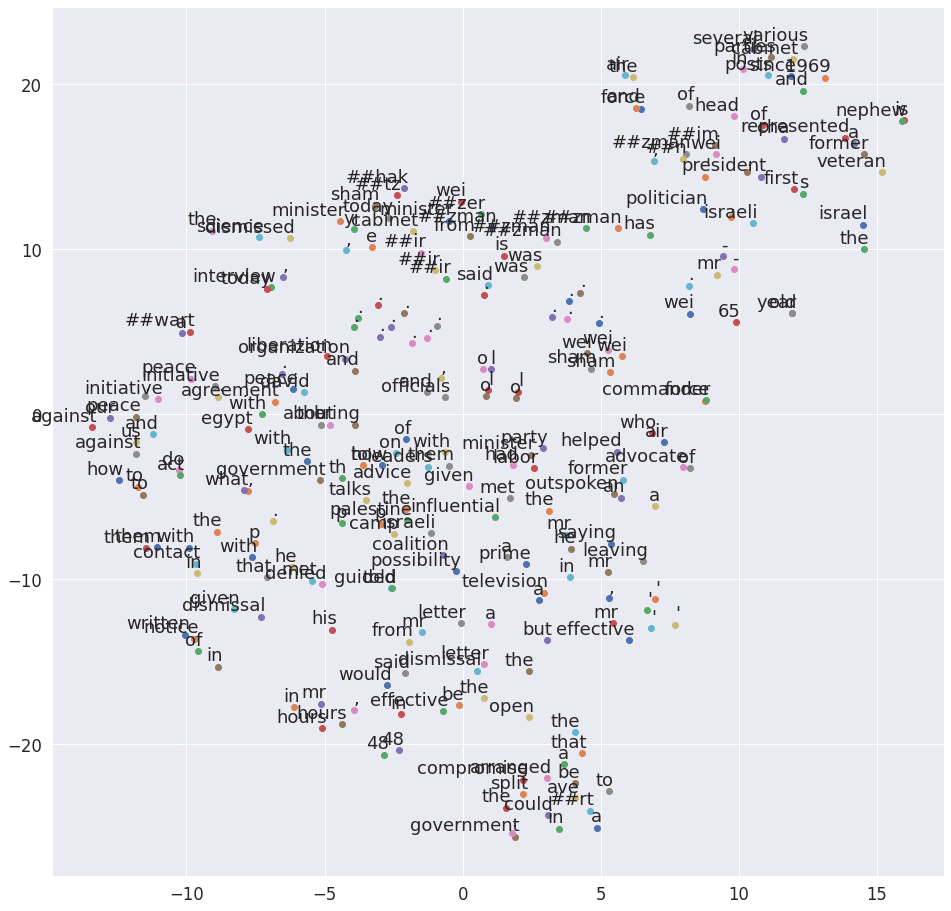

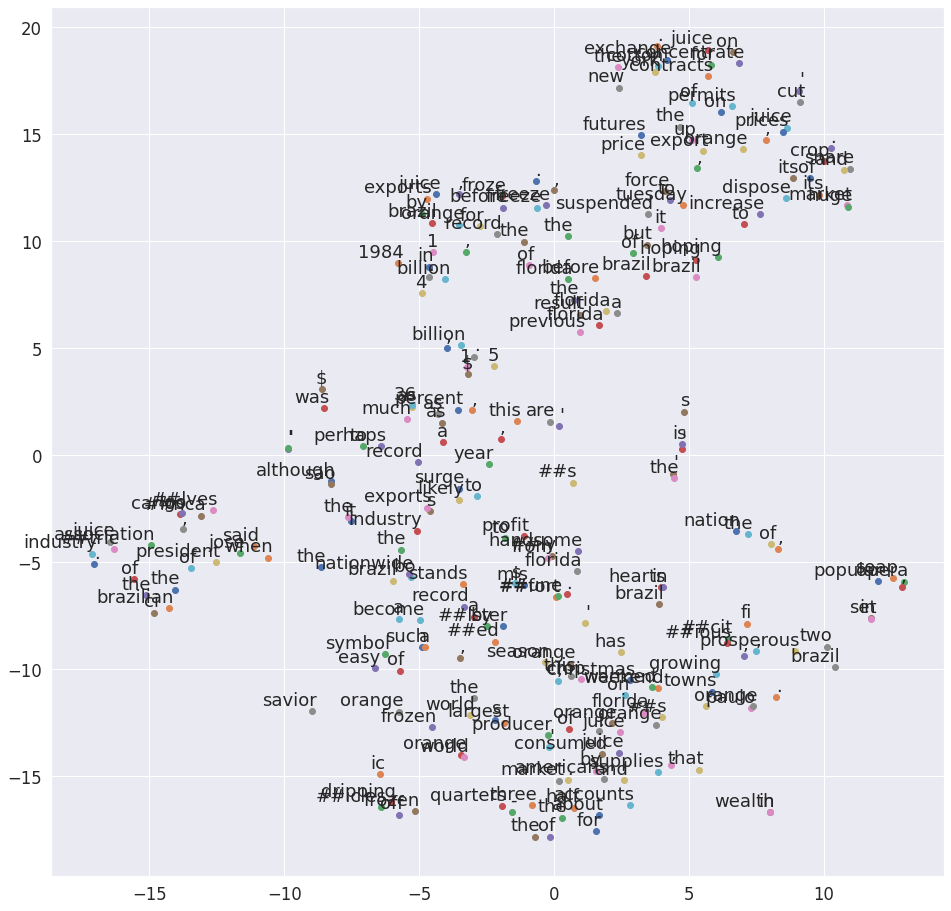

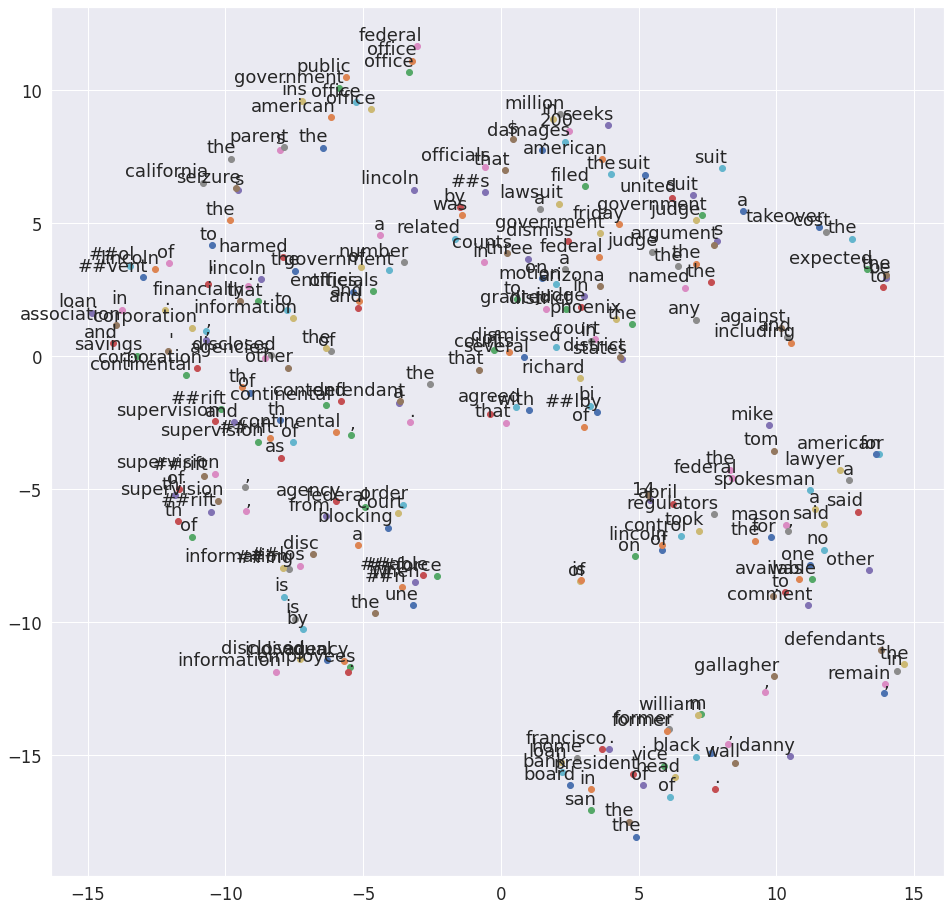

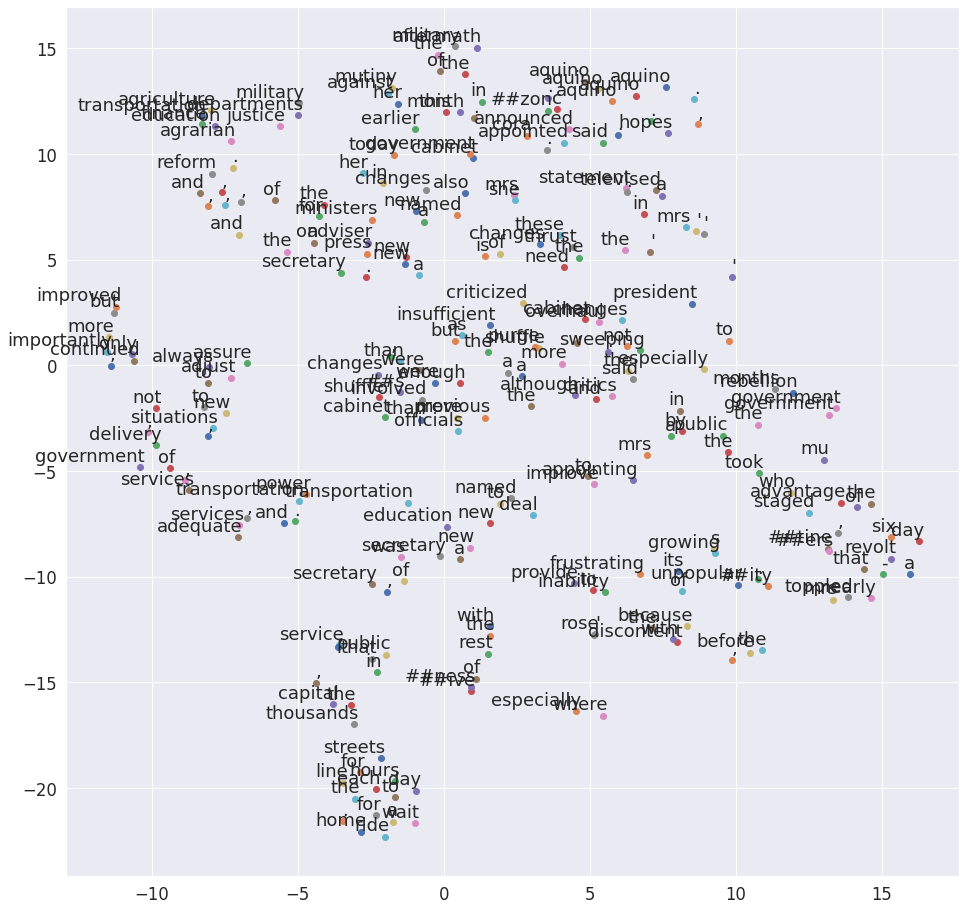

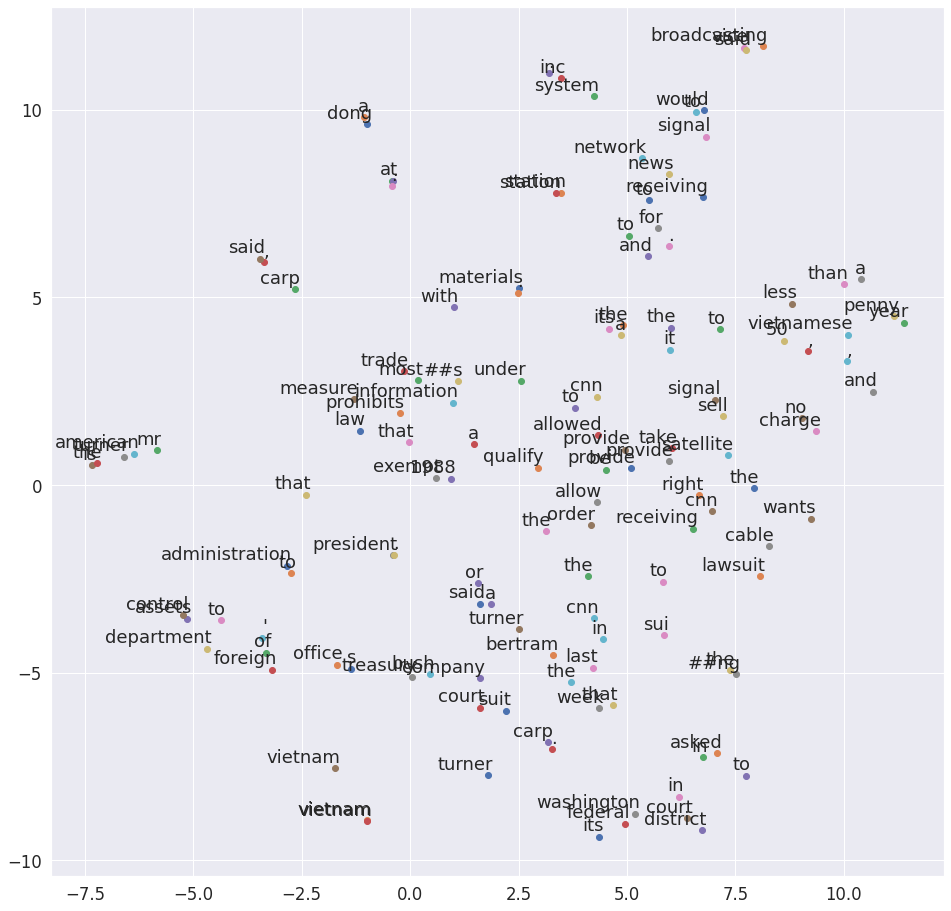

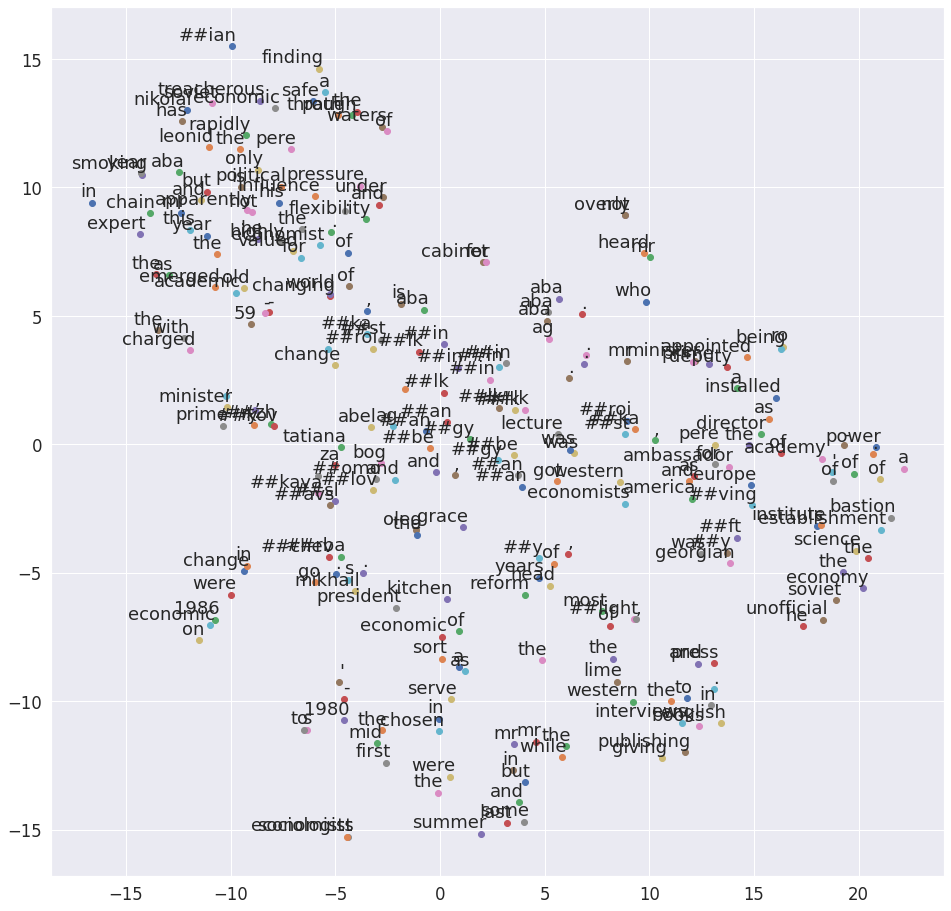

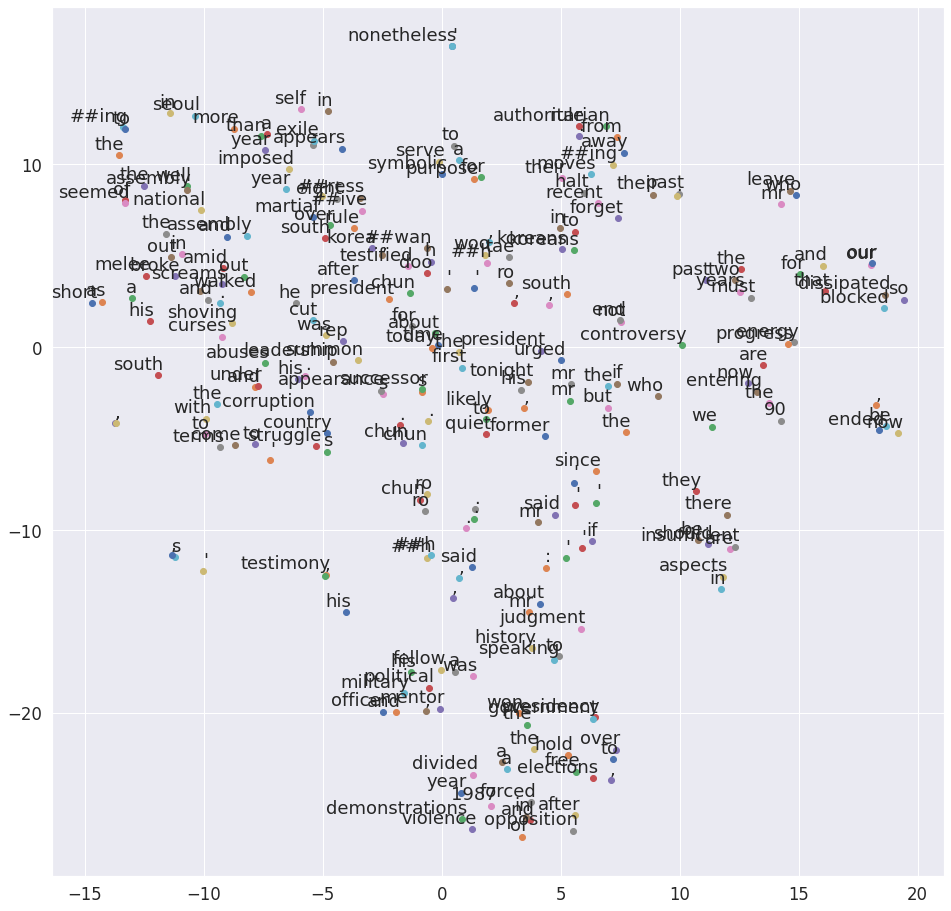

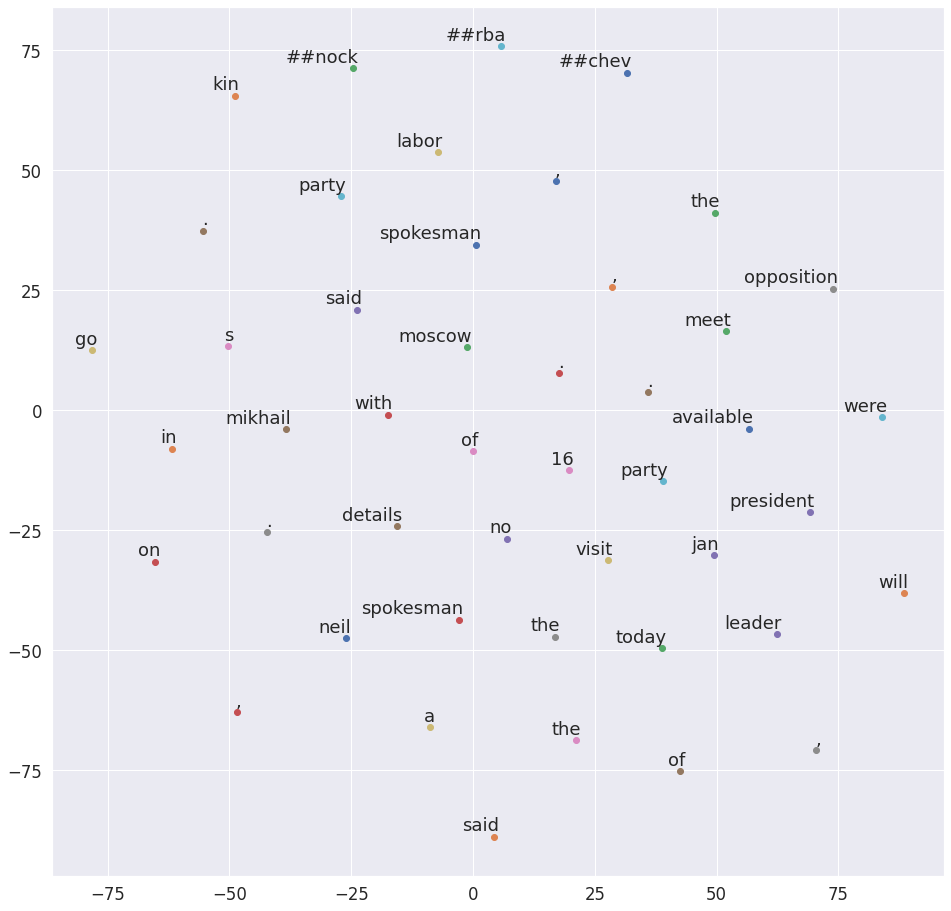

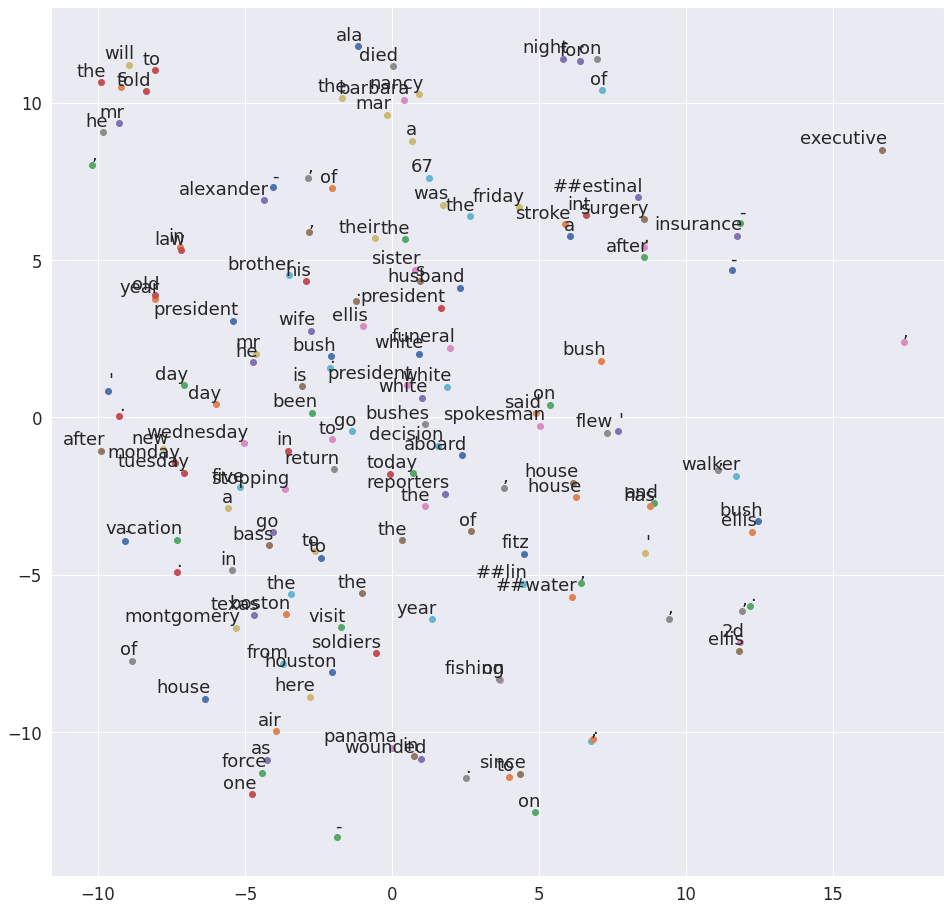

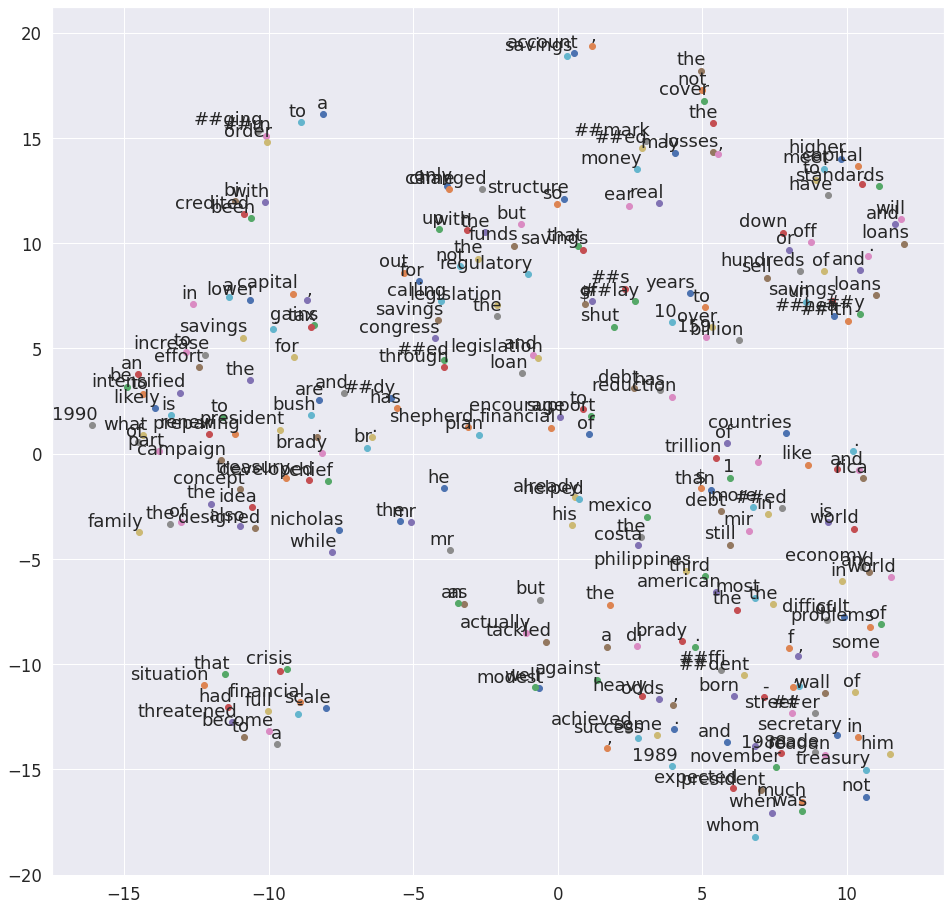

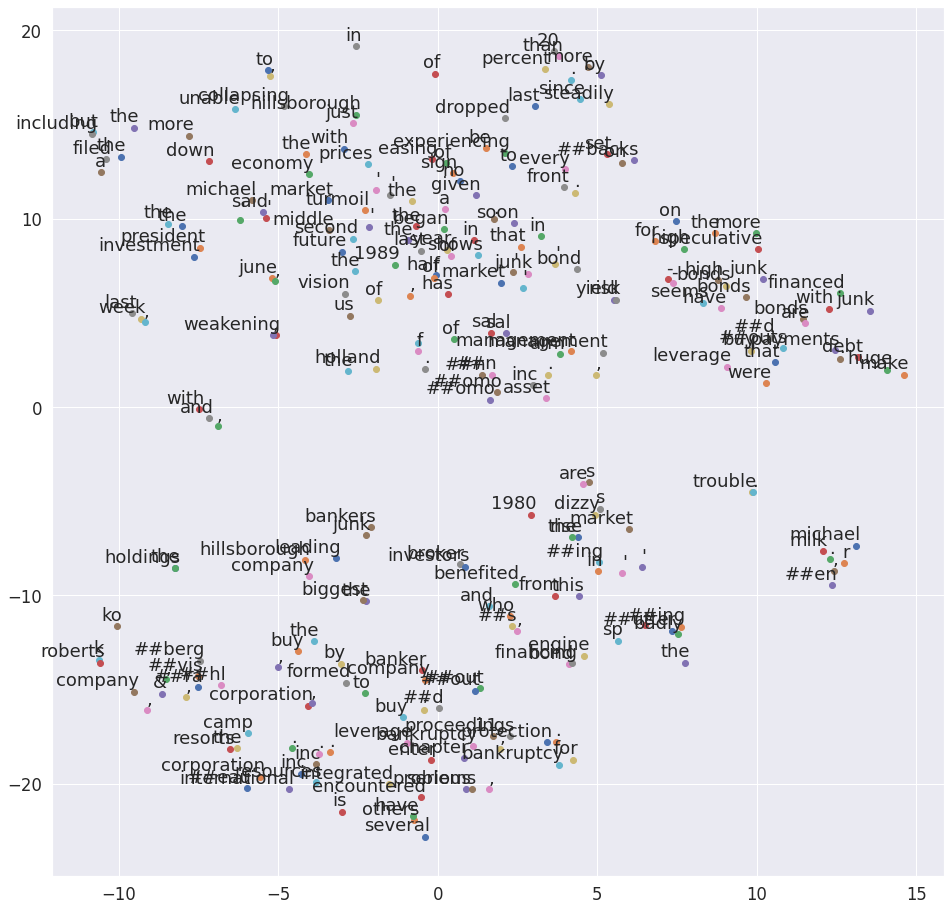

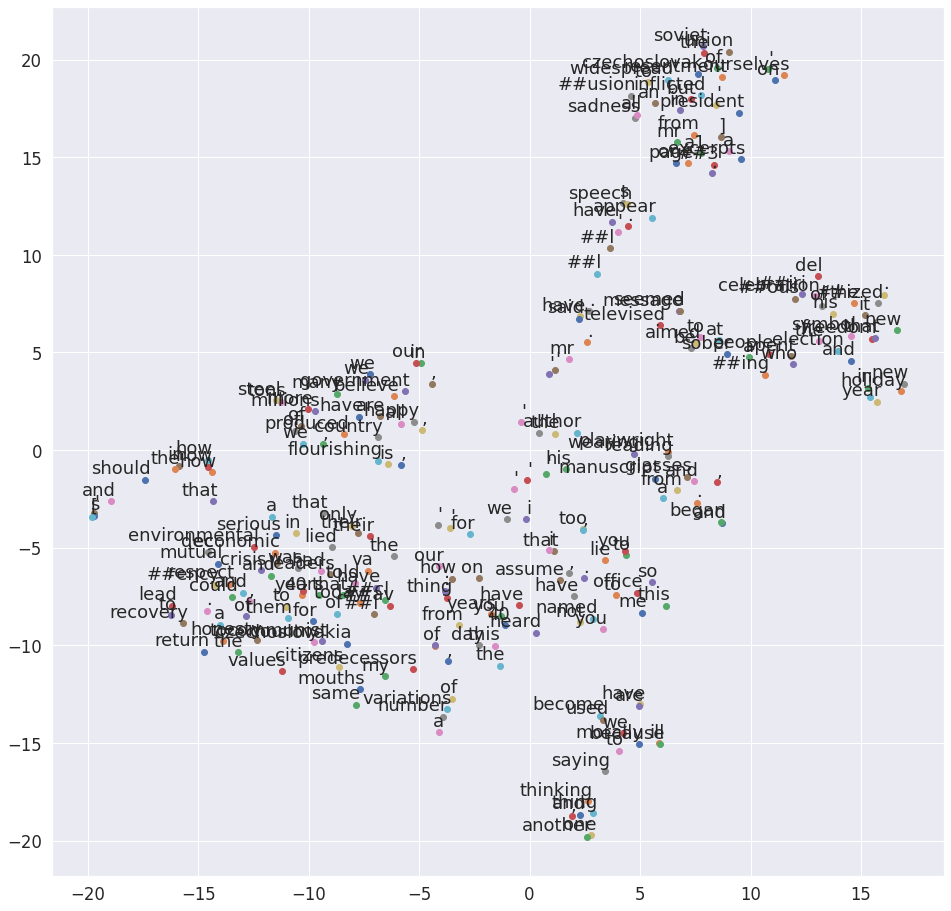

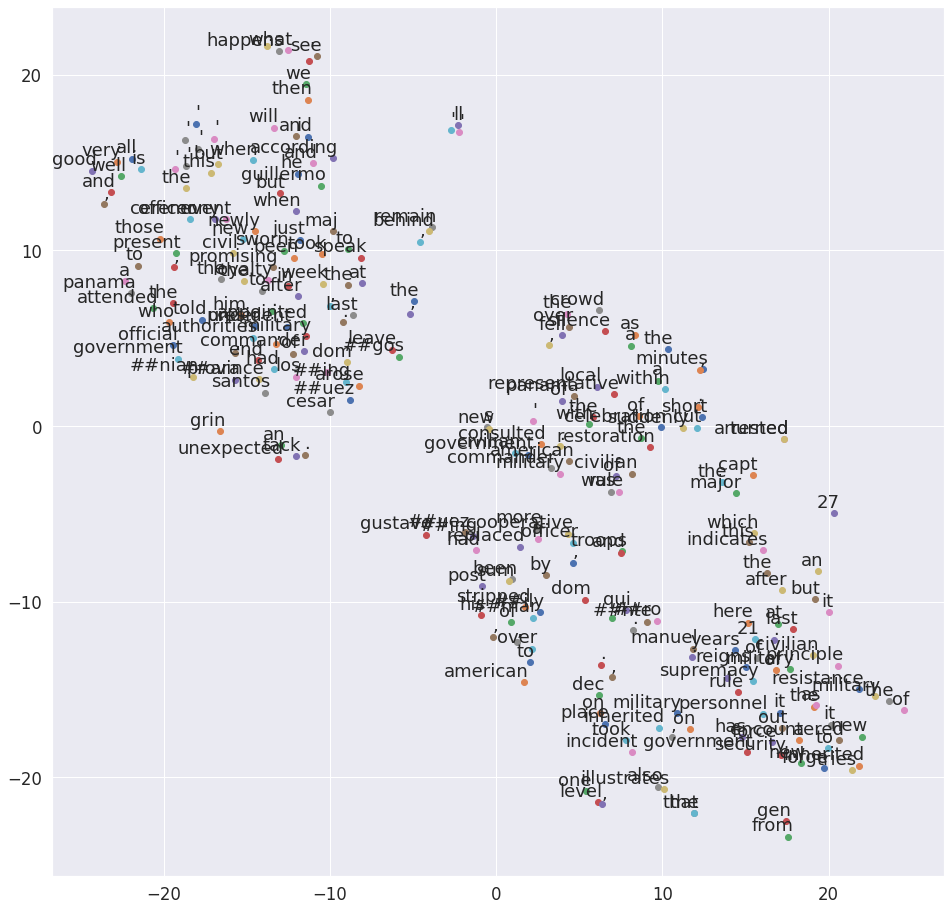

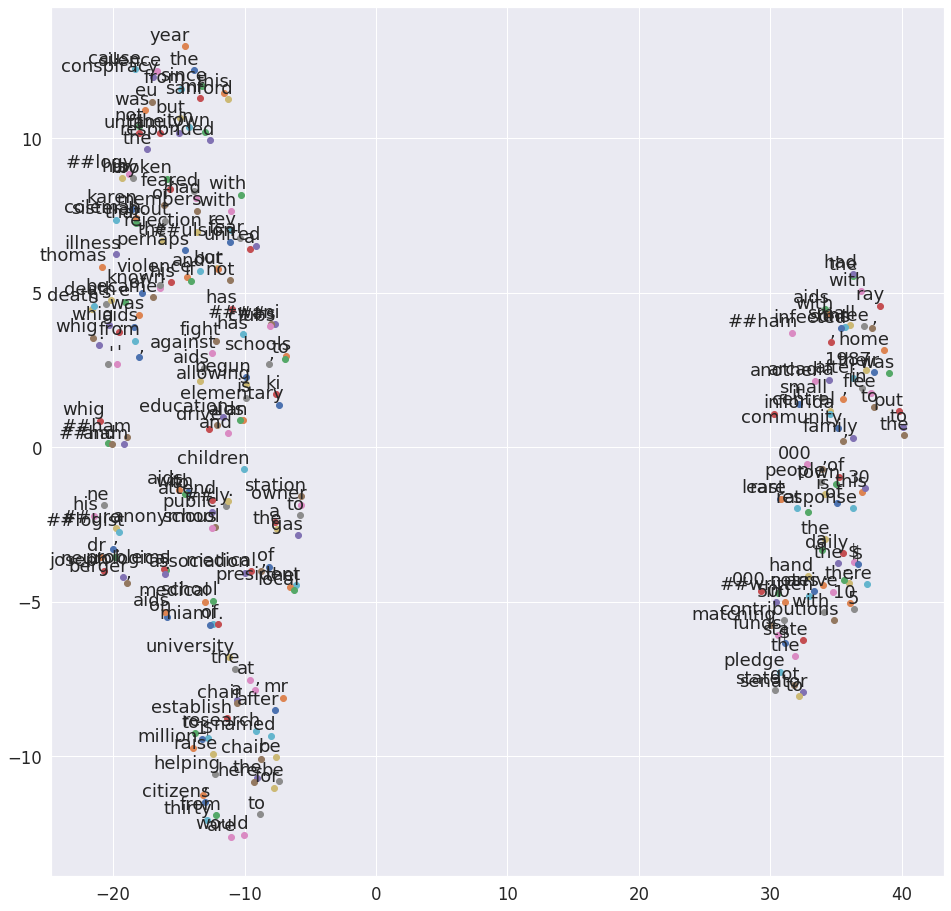

In [175]:

embedding = last_layer.to('cpu').numpy()
# embedding = outputs[1][0].to('cpu').numpy()    outputs[1][12] equales to last_later 
# print(np.shape(embedding))
# print(np.shape(tokenizer.tokenize(sentences[j])[0:np.shape(embedding)[1]]))
for j in list_doc_chosen_word:
  tsne_plot(tokenizer.tokenize(sentences[j])[0:np.shape(embedding)[1]], embedding[j])